# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as po
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.renderers.default = 'vscode'

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Reading dataset

In [2]:
df = pd.read_csv('Data/netflix_titles.csv')

# 3. Understanding dataset

In [3]:
df.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='all')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [7]:
df.describe(include='object')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [8]:
print(df.apply(lambda x: x.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [Movie, TV Show]
title           [Dick Johnson Is Dead, Blood & Water, Gangland...
director        [Kirsten Johnson, nan, Julien Leclercq, Mike F...
cast            [nan, Ama Qamata, Khosi Ngema, Gail Mabalane, ...
country         [United States, South Africa, nan, India, Unit...
date_added      [September 25, 2021, September 24, 2021, Septe...
release_year    [2020, 2021, 1993, 2018, 1996, 1998, 1997, 201...
rating          [PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...
duration        [90 min, 2 Seasons, 1 Season, 91 min, 125 min,...
listed_in       [Documentaries, International TV Shows, TV Dra...
description     [As her father nears the end of his life, film...
dtype: object


In [9]:
print(df.apply(lambda x: len(x.unique())))

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1768
release_year      74
rating            18
duration         221
listed_in        514
description     8775
dtype: int64


# 4. Data Cleaning

In [10]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

It was observed that there are few unknown rating values in the 'rating' feature

In [11]:
valid_ratings = {
  'TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG',
  'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'
}

df['rating'] = df['rating'].apply(lambda x: x if x in valid_ratings else np.nan)

## Checking for duplicate rows in the dataset

In [12]:
df.duplicated().sum()

np.int64(0)

## Checking null values in the dataset

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df[df['duration'].isnull()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year rating  \
5541  Louis C.K.  United States       April 4, 2017          2017    NaN   
5794  Louis C.K.  United States  September 16, 2016          2010    NaN   
5813  Louis C.K.  United States     August 15, 2016          2015    NaN   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

## Getting rid of null values in the dataset

In [15]:
df['duration'] = df['duration'].str.extract('(\d+)').astype('Int64')

In [16]:
df['director'].fillna(value='Unknown', inplace=True)
df['cast'].fillna(value='No Cast', inplace=True)
df['country'].fillna(value=df['country'].mode()[0], inplace=True)
df['rating'].fillna(value=df['rating'].mode()[0], inplace=True)
df['duration'].fillna(value=int(df[df['type'] == 'Movie']['duration'].mean()), inplace=True)

In [17]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## Extracting additional information from 'date_added' feature

In [18]:
df['date_added'] = df['date_added'].str.strip()

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [20]:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [21]:
df['month_added'].fillna(df['month_added'].mode()[0], inplace=True)
df['year_added'].fillna(df['year_added'].mode()[0], inplace=True)

df.drop(columns=['date_added'], inplace=True)

In [22]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [24]:
df.shape

(8807, 13)

# 5. Data visualization using charts and understanding relationship between variables

In [25]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [26]:
labels = ['Movie', 'TV Show']
values = [df['type'].value_counts()[0], df['type'].value_counts()[1]]

colors = ['#1f77b4', '#ff7f0e']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, marker=dict(colors=colors))])

fig.update_layout(
  title='Netflix Show Types',
  title_x=0.5,
  width=500,
  height=500,
  legend=dict(x=1),
  annotations=[dict(
    text='Type of content',
    font_size=20,
    showarrow=False
  )]
)

In [27]:
content_over_years = go.Scatter(x=df['release_year'].value_counts().sort_index().index, y=df['release_year'].value_counts().sort_index().values)

fig = go.Figure(data=content_over_years, layout=go.Layout(title='Content added over years on Netflix', title_x=0.5))

fig.show()

In [28]:
tv_show = df[df['type'] == 'TV Show']
movie = df[df['type'] == 'Movie']

tv_show_year = tv_show['year_added'].value_counts().sort_index()
movie_year = movie['year_added'].value_counts().sort_index()

tv_show_added = go.Scatter(x=tv_show_year.index, y=tv_show_year.values, name='TV Shows', marker=dict(color=colors[1], line=dict(width=4)))
movie_added = go.Scatter(x=movie_year.index, y=movie_year.values, name='Movies', marker=dict(color=colors[0], line=dict(width=4)))

fig = go.Figure(data=[tv_show_added ,movie_added], layout=go.Layout(title='Movies and TV Shows added over years on Netflix', title_x=0.5, legend=dict(x=0.5, orientation='h', xanchor='center')))

fig.show()

In [29]:
#Grouping by country and type, count the number of shows/movies
country_type_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

#Getting total content count per country
country_total = country_type_counts.groupby('country')['count'].sum().sort_values(ascending=False)

#Getting top 10 countries
top10_countries = country_total.head(10).index.tolist()

#Filtering for only top 10 countries
plot_df = country_type_counts[country_type_counts['country'].isin(top10_countries)]

#Sorting countries by total count for consistent plotting
country_order = country_total.loc[top10_countries].index.tolist()

fig = px.bar(
  plot_df,
  x='country',
  y='count',
  color='type',
  category_orders={'country': country_order},
  labels={'country': 'Country', 'count': 'Number of Titles', 'type': 'Type'},
  title='Top 10 Countries with Most Content on Netflix by Type',
  color_discrete_map={
    'Movie': colors[0],
    'TV Show': colors[1]
  }
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [30]:
top20 = df.groupby(["country", "listed_in"])["title"].count().sort_values(ascending=False).head(20)
top20_df = top20.reset_index(name='count')

fig = px.bar(
  top20_df,
  x='count',
  y=top20_df.apply(lambda row: f"{row['country']} - {row['listed_in']}", axis=1),
  orientation='h',
  color='count',
  color_continuous_scale='Reds',
  labels={'y': 'Country - Genre', 'count': 'Content'},
  title='Top 20 Country-Genre Combinations by Amount of Content on Netflix'
)
fig.update_layout(
  yaxis={'categoryorder':'total ascending'},
  width=1000,
  height=700,
  title_x=0.5
)
fig.show()

In [31]:
months_df = pd.DataFrame(df['month_added'].value_counts())
months_df.reset_index(inplace=True)

In [32]:
#Mapping month numbers to month abbreviations
import calendar
months_df['Month'] = months_df['month_added'].apply(lambda x: calendar.month_abbr[int(x)])

#Sorting by month number
months_df = months_df.sort_values(by='month_added', key=lambda x: x.astype(int), ignore_index=True)

fig = px.bar(
  months_df,
  x='Month',
  y='count',
  text_auto=True,
  color='count',
  color_continuous_scale='Oranges',
  labels={'count': 'Count'}
)
fig.update_layout(
  title={
    'text': 'Monthwise addition of content on Netflix',
    'x': 0.5,
    'y': 0.95,
    'xanchor': 'center',
    'yanchor': 'top'
  },
  autosize=False,
  width=1000,
  height=500,
  showlegend=True
)
fig.show()

In [33]:
#Grouping by month and type to get counts for each type per month
#Creating a pivot table so each type i.e. Movie, TV Show, is a separate column (2 bars per month)
month_type_counts = df.pivot_table(index='month_added', columns='type', values='show_id', aggfunc='count', fill_value=0).reset_index()

month_type_counts['Month'] = month_type_counts['month_added'].apply(lambda x: calendar.month_abbr[int(x)] if str(x).isdigit() else x)

#Sorting by month number
month_type_counts = month_type_counts.sort_values(by='month_added', key=lambda x: x.astype(int), ignore_index=True)

fig = px.bar(
  month_type_counts,
  x='Month',
  y=['Movie', 'TV Show'],
  text_auto=True,
  barmode='group',
  color_discrete_sequence=colors,
  labels={'value': 'Count', 'variable': 'Type'}
)
fig.update_layout(
  title={
    'text': 'Monthwise addition of content on Netflix',
    'x': 0.5,
    'y': 0.95,
    'xanchor': 'center',
    'yanchor': 'top'
  },
  autosize=False,
  width=1000,
  height=500,
  showlegend=True
)
fig.show()

In [34]:
top10_genre = df['listed_in'].value_counts().head(10)

fig = px.pie(top10_genre, values=top10_genre.values, names=top10_genre.index, hole=0.9,)
fig.update_traces(textposition='outside', textinfo='percent+label', rotation=0)
fig.update_layout(
  title='Top 10 Netflix Genres by Content Volume',
  title_x=0.5,
  height=600,
  width=900,
  showlegend=False,
  annotations=[dict(
    text='Genres',
    font_size=20,
    showarrow=False
  )]
  )
fig.show()

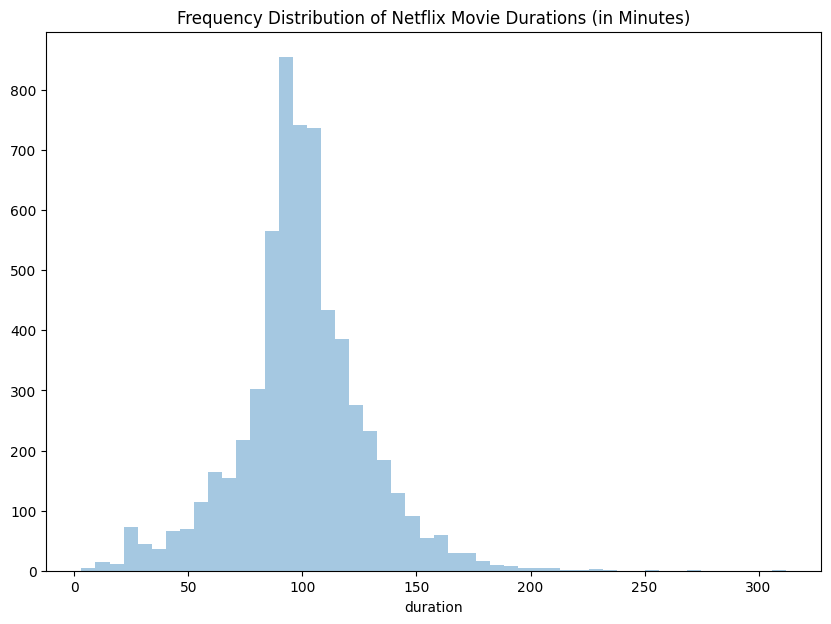

In [35]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['type'] == 'Movie']['duration'], kde=False, color=colors[0])
plt.title('Frequency Distribution of Netflix Movie Durations (in Minutes)')
plt.show()

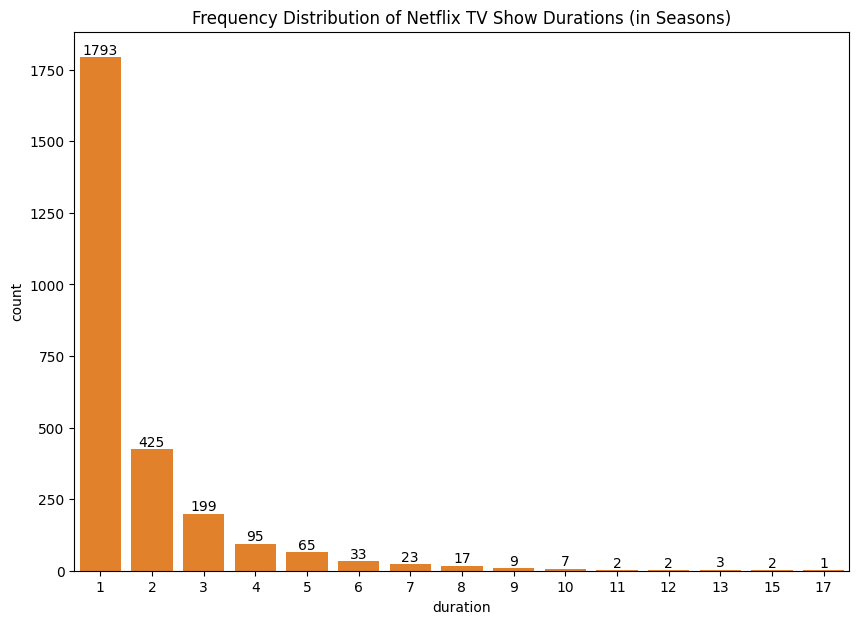

In [36]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x=df[df['type']=='TV Show']['duration'], color=colors[1])
plt.title('Frequency Distribution of Netflix TV Show Durations (in Seasons)')
for p in ax.patches:
  count = int(p.get_height())
  ax.annotate(
    f'{count}', 
    (p.get_x() + p.get_width() / 2, count),
    ha='center', va='bottom', fontsize=10
    )
plt.show()

In [37]:
top10_directors_movie = df[(df['type'] == 'Movie') & (df['director'] != 'Unknown')]['director'].value_counts().head(10)
fig = px.bar(
  x=top10_directors_movie.index,
  y=top10_directors_movie.values,
  color=[df[(df['type'] == 'Movie') & (df['director'] == director)]['country'].mode()[0] for director in top10_directors_movie.index],
  labels={'x': 'Director', 'y': 'Number of Movies', 'color': 'Country'},
  title='10 Directors with Most Movies on Netflix'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [38]:
#For TV Shows, count total number of seasons per director (not just number of shows)
tv_shows = df[(df['type'] == 'TV Show') & (df['director'] != 'Unknown')].copy()

#Extracting number of seasons from 'duration' column (e.g., "2 Seasons" -> 2, "1 Season" -> 1)
tv_shows['num_seasons'] = tv_shows['duration']

#Grouping by director and sum the number of seasons, then get top 10
top10_directors_movie = tv_shows.groupby('director')['num_seasons'].sum().sort_values(ascending=False).head(10)

#For each of the top 10 directors, getting their TV Shows and number of seasons
top10_directors = tv_shows.groupby('director')['num_seasons'].sum().sort_values(ascending=False).head(10).index

#Preparing a DataFrame for plotting: director, show title, number of seasons
plot_df = tv_shows[tv_shows['director'].isin(top10_directors)].copy()

#Extracting number of seasons as integer
plot_df['num_seasons'] = plot_df['duration']
plot_df = plot_df.dropna(subset=['num_seasons'])
plot_df['num_seasons'] = plot_df['num_seasons'].astype(int)

#Sorting directors by total number of seasons for consistent stacking order
director_order = plot_df.groupby('director')['num_seasons'].sum().sort_values(ascending=False).index.tolist()

fig = px.bar(
  plot_df,
  x='director',
  y='num_seasons',
  color='title',
  category_orders={'director': director_order},
  labels={'director': 'Director', 'num_seasons': 'Number of Seasons', 'title': 'TV Show'},
  title='Top 10 TV Show Directors on Netflix: Stacked by Show and Number of Seasons'
)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [39]:
cast=df["cast"].drop_duplicates().unique()

#Flatten and filter
cast_list = [j.strip() for i in cast if i != 'No Cast' for j in i.split(", ")]

#Counting appearances
cast_counts = Counter(cast_list)

#Getting top 10 most common cast members
top10_cast = cast_counts.most_common(10)
top_cast_names = [name for name, count in top10_cast]
top_cast_counts = [count for name, count in top10_cast]

fig = px.bar(
  x=top_cast_names,
  y=top_cast_counts,
  labels={'x': 'Cast Member', 'y': 'Number of Appearances'},
  title='Top 10 Most Frequently Appearing Cast Members on Netflix',
  text_auto=True
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [40]:
fig = px.bar(
  x=df['rating'].value_counts().index,
  y=df['rating'].value_counts().values,
  labels={'x': 'Rating', 'y': 'Count'},
  title='Amount of Content on Netflix based on Rating',
  text_auto=True
)
fig.show()

In [41]:
rating_type_counts = df.pivot_table(index='rating', columns='type', values='show_id', aggfunc='count', fill_value=0).reset_index()

rating_type_counts['total_rating'] = rating_type_counts[['Movie', 'TV Show']].sum(axis=1)

rating_type_counts = rating_type_counts.sort_values(by='total_rating', ascending=False, ignore_index=True)

fig = px.bar(
  rating_type_counts,
  x='rating',
  y=['Movie', 'TV Show'],
  text_auto=True,
  barmode='group',
  color_discrete_sequence=colors,
  title = 'Number of Movies and TV Shows on Netflix based on Rating',
)
fig.show()

In [42]:
ratings = {
  'PG-13': 'Teenagers',
  'TV-MA': 'Adults',
  'PG': 'Older Kids',
  'TV-14': 'Teenagers',
  'TV-PG': 'Older Kids',
  'TV-Y': 'Kids',
  'TV-Y7': 'Older Kids',
  'R': 'Adults',
  'TV-G': 'Kids',
  'G': 'Kids',
  'NC-17': 'Adults',
  'NR': 'Adults',
  'TV-Y7-FV': 'Older Kids',
  'UR': 'Adults'
}

df['age_group'] = df['rating'].replace(ratings)
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               No Cast  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                               No Cast  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            No Cast  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

      release_year rating  duration  \
0             2020  PG-13        90   
1             2021  TV-MA         2   
2             2021  TV-MA         1   
3             2021  TV-MA         1   
4             2021  TV-MA         2   
...            ...    ...       ...   
8802          2007      R       158   
8803          2018  TV-Y7         2   
8804          2009      R        88   
8805          2006     PG        88   
8806          2015  TV-14       111   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...          9.0   
1     After crossing paths at a party, a Cape Town t...          9.0   
2     To protect his family from a powerful drug lor...          9.0   
3     Feuds, flirtations and toilet talk go down amo...          9.0   
4     In a city of coaching centers known to train I...          9.0   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...         11.0   
8803  While living alone in a spooky town, a young g...          7.0   
8804  Looking to survive in a world taken over by zo...         11.0   
8805  Dragged from civilian life, a former superhero...          1.0   
8806  A scrappy but poor boy worms his way into a ty...          3.0   

      year_added   age_group  
0         2021.0   Teenagers  
1         2021.0      Adults  
2         2021.0      Adults  
3         2021.0      Adults  
4         2021.0      Adults  
...          ...         ...  
8802      2019.0      Adults  
8803      2019.0  Older Kids  
8804      201

In [43]:
corr_heatmap_genre = df[df['listed_in'].isin(top10_genre.index)]
corr_heatmap_genre = pd.crosstab(corr_heatmap_genre['listed_in'], corr_heatmap_genre['age_group'], normalize="index")
corr_heatmap_genre

age_group                                           Adults      Kids  \
listed_in                                                              
Children & Family Movies                          0.000000  0.516279   
Children & Family Movies, Comedies                0.000000  0.164179   
Comedies, Dramas, International Movies            0.346715  0.007299   
Documentaries                                     0.392758  0.052925   
Documentaries, International Movies               0.387097  0.059140   
Dramas, Independent Movies, International Movies  0.642857  0.007937   
Dramas, International Movies                      0.475138  0.005525   
Dramas, International Movies, Romantic Movies     0.338889  0.016667   
Kids' TV                                          0.000000  0.568182   
Stand-Up Comedy                                   0.886228  0.008982   

age_group                                         Older Kids  Teenagers  
listed_in                                                                
Children & Family Movies                            0.483721   0.000000  
Children & Family Movies, Comedies                  0.830846   0.004975  
Comedies, Dramas, International Movies              0.113139   0.532847  
Documentaries                                       0.242340   0.311978  
Documentaries, International Movies                 0.231183   0.322581  
Dramas, Independent Movies, International Movies    0.079365   0.269841  
Dramas, International Movies                        0.102210   0.417127  
Dramas, International Movies, Romantic Movies       0.122222   0.522222  
Kids' TV                                            0.431818   0.000000  
Stand-Up Comedy                                     0.017964   0.086826

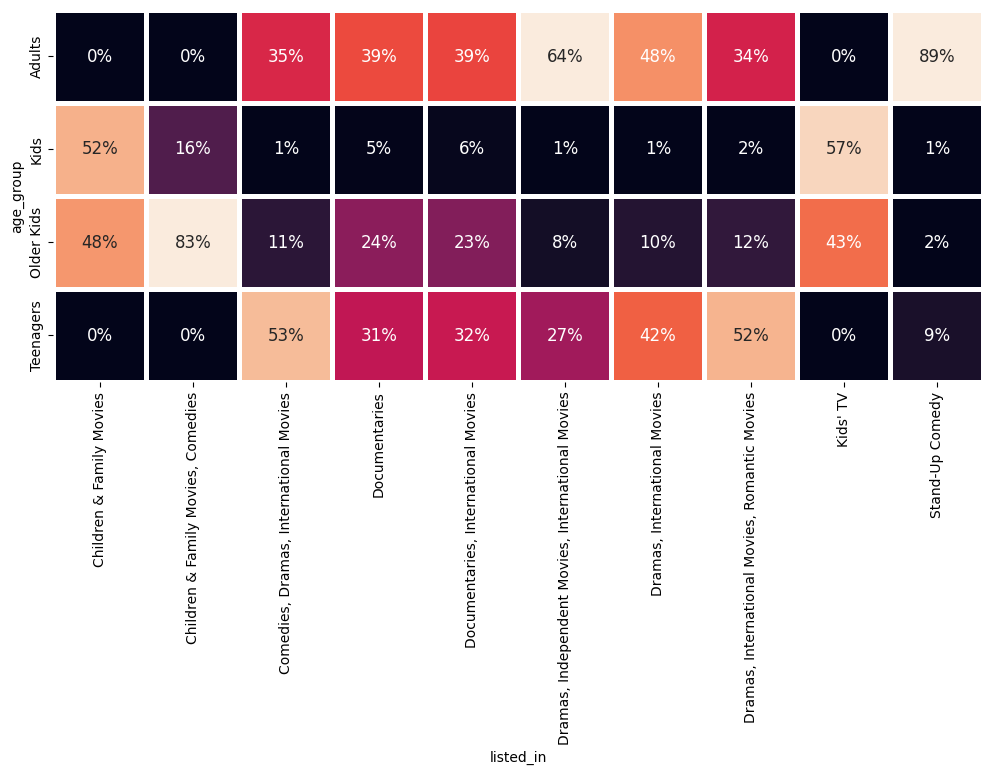

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

sns.heatmap(
  data=corr_heatmap_genre.T,
  square=True,
  linewidth=2.5,
  cbar=False,
  annot=True,
  fmt='1.0%',
  vmax=0.6,
  vmin=0.05,
  ax=ax,
  annot_kws={'fontsize': 12}
  )

plt.show()

In [45]:
corr_heatmap_country = df[df['country'].isin(top10_countries)]
corr_heatmap_country = pd.crosstab(corr_heatmap_country['country'], corr_heatmap_country['age_group'], normalize="index")
corr_heatmap_country

age_group         Adults      Kids  Older Kids  Teenagers
country                                                  
Canada          0.441989  0.176796    0.220994   0.160221
Egypt           0.273585  0.009434    0.037736   0.679245
France          0.669355  0.096774    0.056452   0.177419
India           0.260288  0.014403    0.155350   0.569959
Japan           0.359184  0.012245    0.244898   0.383673
Mexico          0.772727  0.018182    0.081818   0.127273
South Korea     0.442211  0.025126    0.115578   0.417085
Spain           0.841379  0.020690    0.041379   0.096552
United Kingdom  0.513126  0.100239    0.195704   0.190931
United States   0.464785  0.084407    0.195122   0.255686

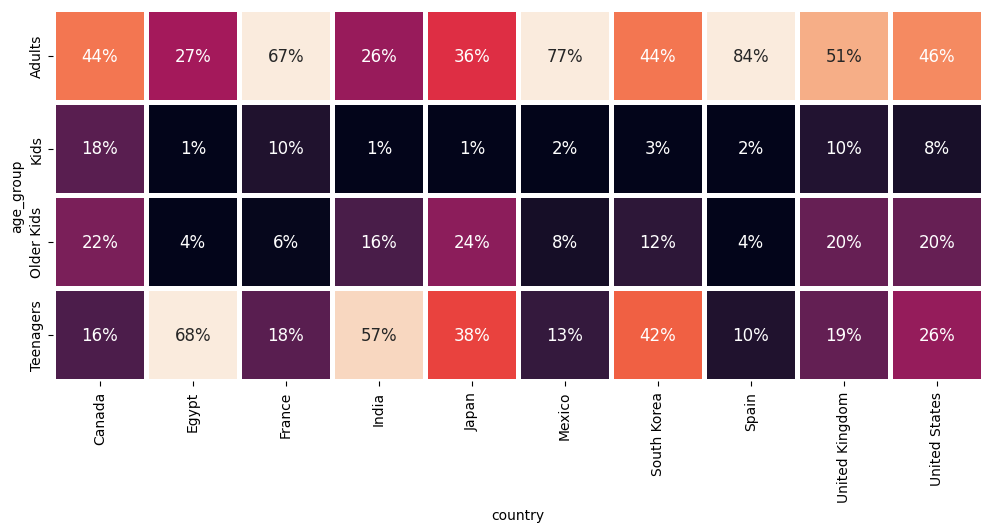

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

sns.heatmap(
  data=corr_heatmap_country.T,
  square=True,
  linewidth=2.5,
  cbar=False,
  annot=True,
  fmt='1.0%',
  vmax=0.6,
  vmin=0.05,
  ax=ax,
  annot_kws={'fontsize': 12}
  )

plt.show()

# 6. Pre-processing

In [47]:
df['clustering'] = df[['director', 'cast', 'country', 'listed_in', 'description']].agg(' '.join, axis=1)

Importing libraries required for textual data processing

In [48]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('all', quiet=True)
from PIL import Image

Converting text into lowercase, removing urls, tokenizing text, removing non-alphanumeric, stopwords and punctuation tokens and lemmatizing words

In [49]:
def transform_text(text):
  stopword_set = set(stopwords.words('english'))
  punctuation_set = set(string.punctuation)

  text = text.lower()                   #Converting text to lower case
  text = re.sub(r'http\S+', '', text)   #Remvoing URLs from the text
  words = nltk.word_tokenize(text)      #Tokenizing text into words

  #Removing non-alphanumeric, stopwords and punctuation tokens
  words = [word for word in words if word.isalnum() and word not in stopword_set and word not in punctuation_set]

  #Lemmatizing words
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return ' '.join(lemmatized_words)

In [50]:
df['CleanText'] = df['clustering'].apply(transform_text)

In [51]:
df['CleanText'][0]

'kirsten johnson cast united state documentary father nears end life filmmaker kirsten johnson stage death inventive comical way help face inevitable'

# 7. Model Implementation

In [52]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

## I. K-Prototypes

In [53]:
categorical_text_cols = df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']
categorical_text_cols.apply(transform_text)
categorical_text_cols[6]

"Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr Children & Family Movies Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."

### Text Vectorization, Dimensionality Reduction

In [54]:
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
X_tfidf = tfidf.fit_transform(categorical_text_cols)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

numerical_cols = ['release_year']
categorical_cols = ['type', 'director', 'rating', 'age_group', 'country']

#Creating a new DataFrame for clustering
df_cluster = df[numerical_cols + categorical_cols].copy()

#Normalizing numerical columns
scaler = MinMaxScaler()
df_cluster[numerical_cols] = scaler.fit_transform(df_cluster[numerical_cols])

#Ensuring categorical columns are strings
for col in categorical_cols:
  df_cluster[col] = df_cluster[col].astype(str)

#Appending PCA components
pca_df = pd.DataFrame(X_pca, columns=['desc1', 'desc2', 'desc3', 'desc4', 'desc5'])
df_cluster = pd.concat([df_cluster.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

#Final numeric and categorical split
final_numerical_cols = numerical_cols + ['desc1', 'desc2', 'desc3', 'desc4', 'desc5']
final_categorical_cols = categorical_cols
X_matrix = df_cluster.to_numpy()

#Fetching categorical column indices
cat_col_indices = [df_cluster.columns.get_loc(col) for col in final_categorical_cols]

To find the optimal number of clusters (K), it's helpful to compute the clustering cost for values of K ranging from 2 to 15.

A lower cost indicates better compactness of clusters, but increasing K too much can lead to unnecessary complexity.

Therefore, an elbow plot is useful to identify the point at which the reduction in cost begins to level off, indicating a good balance between compactness and simplicity.

In [55]:
cost = []
K = range(2, 15)

for k in K:
  kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
  kproto.fit_predict(X_matrix, categorical=cat_col_indices)
  cost.append(kproto.cost_)

Using the Elbow Method to plot Cost vs. K to find the optimal number of clusters:

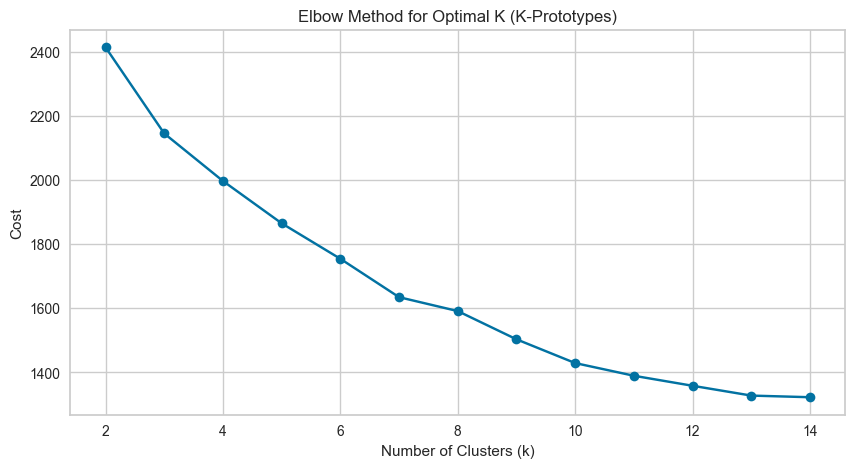

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(K, cost, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (K-Prototypes)')
plt.grid(True)
plt.show()

In [57]:
optimal_k = 7

kproto = KPrototypes(n_clusters=optimal_k, init='Cao', verbose=1, random_state=42)
clusters = kproto.fit_predict(X_matrix, categorical=cat_col_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3532, ncost: 1904.170732299365
Run: 1, iteration: 2/100, moves: 1781, ncost: 1774.5587707800587
Run: 1, iteration: 3/100, moves: 394, ncost: 1772.1096784871368
Run: 1, iteration: 4/100, moves: 56, ncost: 1772.0450893658738
Run: 1, iteration: 5/100, moves: 30, ncost: 1772.0126318357452
Run: 1, iteration: 6/100, moves: 21, ncost: 1771.9921116192265
Run: 1, iteration: 7/100, moves: 32, ncost: 1771.939394916312
Run: 1, iteration: 8/100, moves: 20, ncost: 1771.910931349433
Run: 1, iteration: 9/100, moves: 547, ncost: 1733.6215377895142
Run: 1, iteration: 10/100, moves: 353, ncost: 1729.3127255989114
Run: 1, iteration: 11/100, moves: 86, ncost: 1729.0658802372723
Run: 1, iteration: 12/100, moves: 34, ncost: 1729.028172208604
Run: 1, iteration: 13/100, moves: 22, ncost: 1729.0123035196787
Run: 1, iteration:

In [58]:
df['kproto_cluster'] = clusters
df['kproto_cluster'].value_counts()

kproto_cluster
0    2539
3    1515
2    1232
4    1215
5    1207
6     717
1     382
Name: count, dtype: int64

In [59]:
for i in range(optimal_k):
  print(f"\nCluster {i}")
  print(df[df['kproto_cluster'] == i][['type', 'rating', 'country']].describe(include='all'))


Cluster 0
         type rating        country
count    2539   2539           2539
unique      2     11            377
top     Movie  TV-MA  United States
freq     2486   1535           1046

Cluster 1
         type rating        country
count     382    382            382
unique      2      7             22
top     Movie  TV-MA  United States
freq      342    324            283

Cluster 2
           type rating        country
count      1232   1232           1232
unique        2      6            114
top     TV Show  TV-14  United States
freq       1231    731            572

Cluster 3
         type rating country
count    1515   1515    1515
unique      1      9     216
top     Movie  TV-14   India
freq     1515   1220     605

Cluster 4
         type rating        country
count    1215   1215           1215
unique      2      9            179
top     Movie  TV-PG  United States
freq     1098    433            697

Cluster 5
           type rating        country
count      1207   120

## II. HDBSCAN

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import hdbscan

In [61]:
numerical_cols = ['release_year']
categorical_cols = ['type', 'director', 'rating', 'age_group', 'country']
text_col = 'description'

#Preprocessing numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(df[numerical_cols].fillna(df[numerical_cols].median()))

#Preprocessing categorical features with OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = ohe.fit_transform(df[categorical_cols].fillna('Unknown'))

#Vectorizing text column with TF-IDF, limiting max features for noise reduction
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df[text_col].fillna(''))

In [62]:
from scipy.sparse import hstack
from scipy import sparse

X_num_sparse = sparse.csr_matrix(X_num)
X_cat_sparse = sparse.csr_matrix(X_cat)
X_combined = hstack([X_num_sparse, X_cat_sparse, X_text])

pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(X_combined.toarray())

clusterer = hdbscan.HDBSCAN(
  min_cluster_size=20,
  min_samples=10, 
  cluster_selection_method='eom',
  prediction_data=True,
  gen_min_span_tree=True
)

In [63]:
cluster_labels = clusterer.fit_predict(X_reduced)
df['hdbscan_cluster'] = cluster_labels

In [64]:
df['hdbscan_cluster'].value_counts()

hdbscan_cluster
-1     1550
 55     696
 28     516
 57     446
 31     404
       ... 
 24      21
 68      21
 52      20
 20      20
 64      20
Name: count, Length: 76, dtype: int64

In [65]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise = np.sum(cluster_labels == -1)
print(f"Number of clusters: {num_clusters}")
print(f"Noise points: {num_noise}")

Number of clusters: 75
Noise points: 1550


In [66]:
from sklearn.decomposition import PCA
if X_reduced.shape[1] > 3:
  X_3d = PCA(n_components=3).fit_transform(X_reduced)
else:
  X_3d = X_reduced

df_plot = pd.DataFrame({
  'PC1': X_3d[:, 0],
  'PC2': X_3d[:, 1],
  'PC3': X_3d[:, 2],
  'cluster': cluster_labels.astype(str)
})

fig = px.scatter_3d(
  df_plot, x='PC1', y='PC2', z='PC3',
  color='cluster',
  title='HDBSCAN Clusters (3D PCA)',
  labels={'cluster': 'Cluster'},
  opacity=0.7
)
fig.show()

In [67]:
df['hdbscan_cluster'] = df['hdbscan_cluster'].replace(-1, df['hdbscan_cluster'].max() + 1)

hdbscan_cluster = 75 (this cluster contains outliers, i.e. rows predicted by the model as -1)

In [68]:
df['hdbscan_cluster'].value_counts()

hdbscan_cluster
75    1550
55     696
28     516
57     446
31     404
      ... 
24      21
68      21
52      20
20      20
64      20
Name: count, Length: 76, dtype: int64

## III. Topic Modeling (LDA) + Clustering (HDBSCAN)

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Vectorizing using CountVectorizer for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['CleanText'])

#Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topic_distributions = lda.fit_transform(doc_term_matrix)

For LDA-based topic modeling, I used CountVectorizer to retain the influence of frequently occurring terms, as LDA considers such terms potentially significant for identifying underlying topics.

In contrast, for K-Means clustering, I have applied the TF-IDF Vectorizer, where rare but meaningful terms are given higher importance, improving the separation and distinction between document clusters.

In [70]:
#Clustering using HDBSCAN on topic distributions
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)
cluster_labels = clusterer.fit_predict(lda_topic_distributions)

In [71]:
df['lda_hdbscan_cluster'] = cluster_labels
df['lda_hdbscan_cluster'].value_counts()

lda_hdbscan_cluster
-1     4624
 49     160
 28     129
 30     110
 16     108
       ... 
 67      11
 99      10
 7       10
 12      10
 75      10
Name: count, Length: 145, dtype: int64

Since LDA produces dense, non-linear topic vectors, i have used t-SNE rather then PCA as it is a good choice for visualizing such complex, high-dimensional embeddings like 'lda_topic_distributions' used below

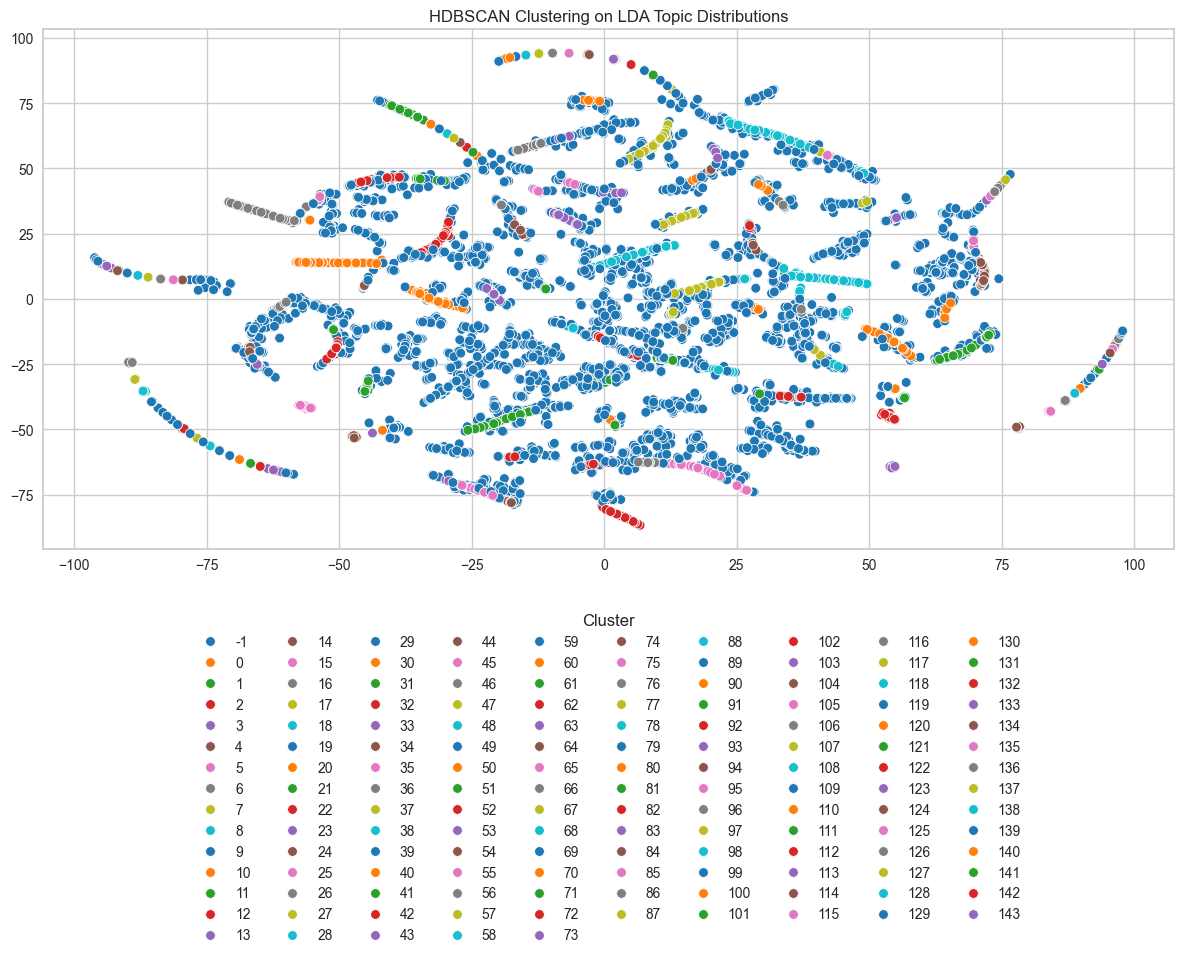

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embedding = tsne.fit_transform(lda_topic_distributions)

x = embedding[:, 0]
y = embedding[:, 1]

plt.figure(figsize=(12, 10))
sns.scatterplot(x=x, y=y, hue=df['lda_hdbscan_cluster'], palette='tab10')
plt.title("HDBSCAN Clustering on LDA Topic Distributions")
plt.legend(title='Cluster', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=10)
plt.tight_layout()
plt.show()

In [73]:
df['lda_hdbscan_cluster'] = df['lda_hdbscan_cluster'].replace(-1, df['lda_hdbscan_cluster'].max() + 1)

In [74]:
df['lda_hdbscan_cluster'].value_counts()

lda_hdbscan_cluster
144    4624
49      160
28      129
30      110
16      108
       ... 
67       11
99       10
7        10
12       10
75       10
Name: count, Length: 145, dtype: int64

## IV. K-Means

### Text Vectorization

In [75]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X = t_vectorizer.fit_transform(df['CleanText'])

In [76]:
X.shape

(8807, 20000)

In [77]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şenolsun', 'şimşek', 'şinasi'],
      shape=(20000,), dtype=object)

In [78]:
import pickle

with open('Model/tfidf_vectorizer.pkl', 'wb') as f:
  pickle.dump(t_vectorizer, f)

In [79]:
#Also saving TF-IDF matrix for recommendations (based on description search)
np.save('Model/tfidf_matrix.npy', X.toarray())

### Dimensionality Reduction

In [80]:
pca = PCA()
pca.fit(X.toarray())

PCA()

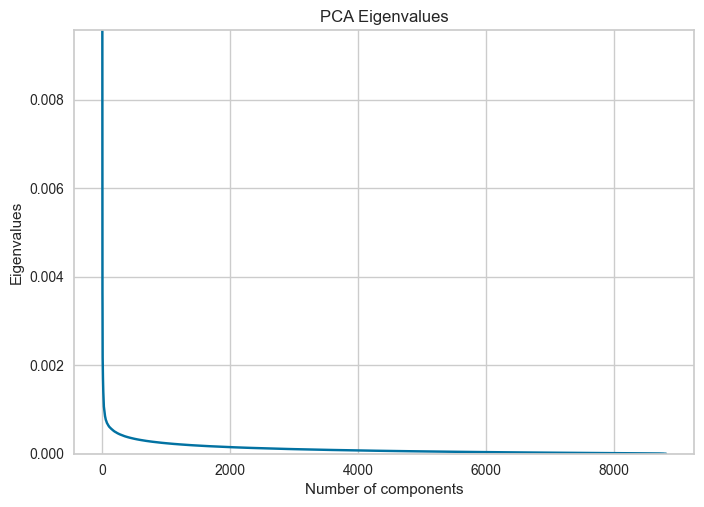

In [81]:
plt.xlabel("Number of components")
plt.ylabel("Eigenvalues")
plt.ylim(0, max(pca.explained_variance_))
plt.title("PCA Eigenvalues")
plt.plot(pca.explained_variance_)
plt.show()

In [82]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
for i, val in enumerate(cum_var):
  print(f"{i+1} components -> {val*100:.2f}% variance explained")

1 components -> 0.97% variance explained
2 components -> 1.43% variance explained
3 components -> 1.79% variance explained
4 components -> 2.13% variance explained
5 components -> 2.35% variance explained
6 components -> 2.58% variance explained
7 components -> 2.78% variance explained
8 components -> 2.98% variance explained
9 components -> 3.17% variance explained
10 components -> 3.35% variance explained
11 components -> 3.52% variance explained
12 components -> 3.68% variance explained
13 components -> 3.84% variance explained
14 components -> 3.99% variance explained
15 components -> 4.14% variance explained
16 components -> 4.28% variance explained
17 components -> 4.42% variance explained
18 components -> 4.55% variance explained
19 components -> 4.67% variance explained
20 components -> 4.79% variance explained
21 components -> 4.91% variance explained
22 components -> 5.03% variance explained
23 components -> 5.14% variance explained
24 components -> 5.25% variance explained
2

In [83]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = len(cumulative_variance)

fig = go.Figure()

#Cumulative explained variance trace
fig.add_trace(go.Scatter(
  x=list(range(1, num_components + 1)),
  y=cumulative_variance,
  mode='lines',
  name='Cumulative Explained Variance',
  line=dict(color='blue')
))

#95% explained variance line trace
fig.add_trace(go.Scatter(
  x=[1, num_components],
  y=[0.95, 0.95],
  mode='lines',
  name='95% Explained Variance',
  line=dict(color='red', dash='dash')
))

fig.update_layout(
  title='Cumulative Explained Variance by Number of PCA Components',
  xaxis_title='Number of Components',
  yaxis_title='Cumulative Explained Variance',
  width=900,
  height=500,
  template='plotly_white',
  showlegend=True,
  legend=dict(
    orientation='h',
    x=0.5,
    y=-0.2,
    xanchor='center',
    yanchor='top'
  )
)
fig.show()


In [84]:
pca_95 = PCA(n_components=0.95)
pca_95.fit(X.toarray())
X_transformed = pca_95.transform(X.toarray())

In [85]:
X_transformed

array([[-0.05373057,  0.11281435,  0.06981396, ..., -0.00247427,
        -0.00417197, -0.0011879 ],
       [ 0.12021826, -0.03110383, -0.01124771, ...,  0.00035705,
         0.00361523,  0.00493635],
       [ 0.16658194,  0.00443606, -0.04430875, ..., -0.00634229,
         0.00895311, -0.00324726],
       ...,
       [-0.05588682,  0.00829873, -0.04176358, ..., -0.00045674,
         0.01545077,  0.0027931 ],
       [-0.06871729,  0.01075354, -0.07532478, ...,  0.00368866,
        -0.00847239, -0.0074153 ],
       [-0.07399545, -0.06230523,  0.08777837, ...,  0.00355342,
        -0.00744032,  0.00213331]], shape=(8807, 6161))

Finding the optimal number of clusters:

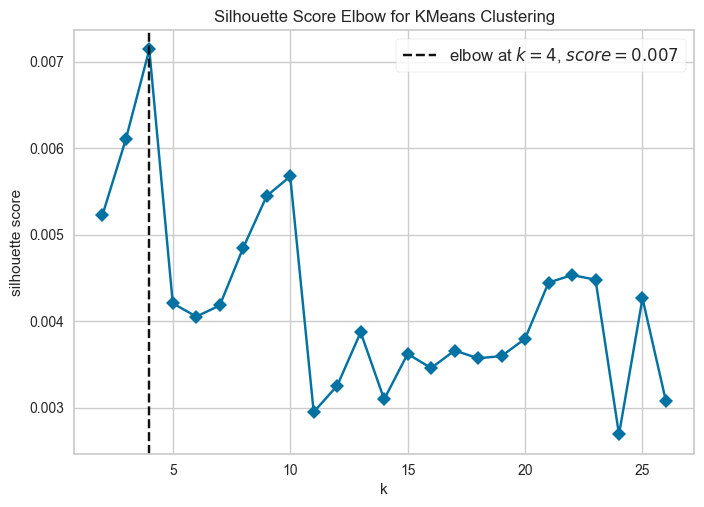

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [86]:
model = KMeans(init='k-means++', random_state=42)
visualizer = KElbowVisualizer(
  model,
  k=(2, 27),
  metric='silhouette',
  timings=False,
  locate_elbow=True,
  colors='purple'
  )
visualizer.fit(X_transformed)
visualizer.show()

In [87]:
print("Optimal number of clusters:", visualizer.elbow_value_)

Optimal number of clusters: 4


Examining the quality of clustering for a particular 'k':

Number of clusters: 2,  Silhouette Score: 0.005221265588094466


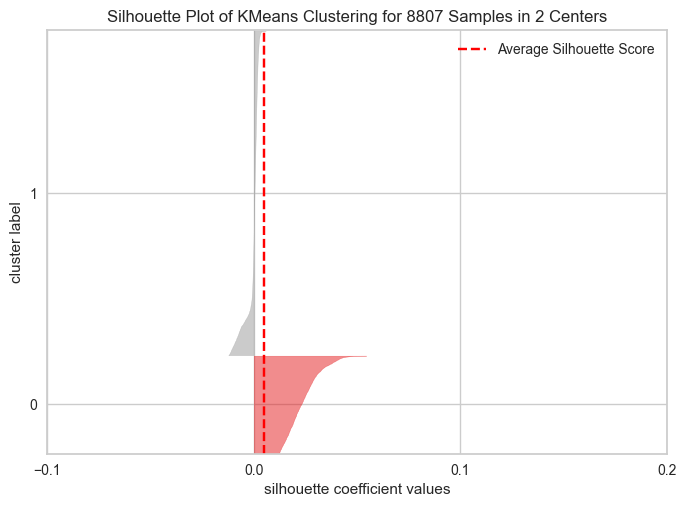

Number of clusters: 3,  Silhouette Score: 0.006101300276561376


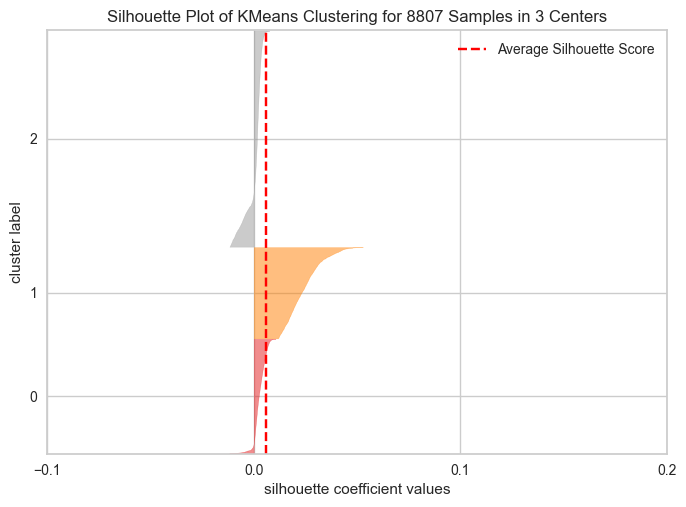

Number of clusters: 4,  Silhouette Score: 0.007140466230184991


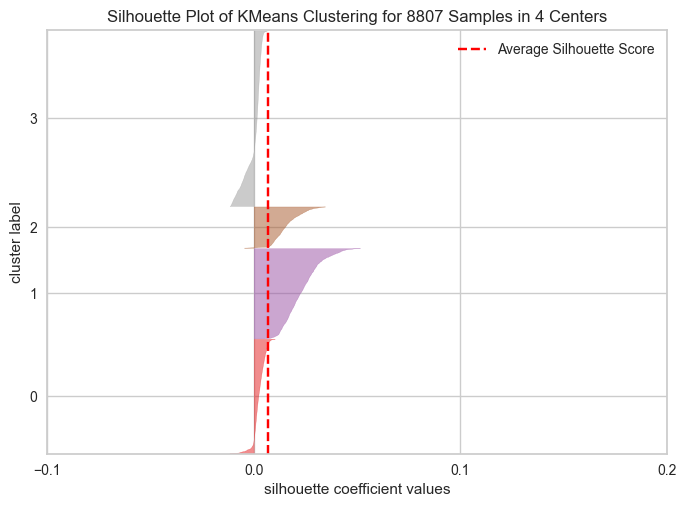

Number of clusters: 5,  Silhouette Score: 0.004204912352887562


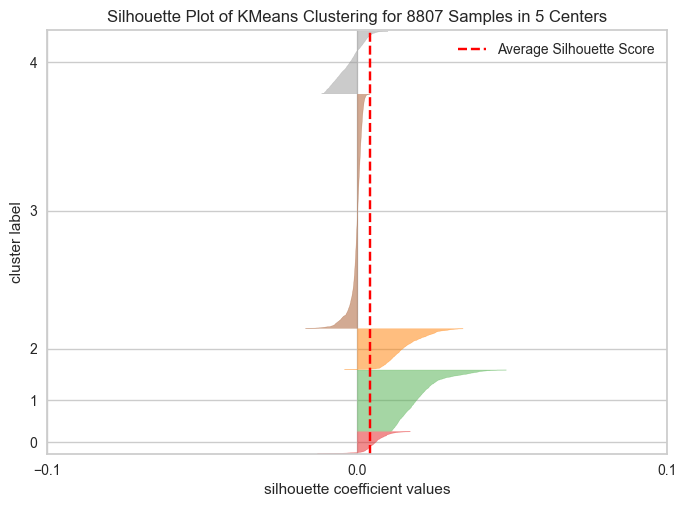

Number of clusters: 6,  Silhouette Score: 0.004052484079178218


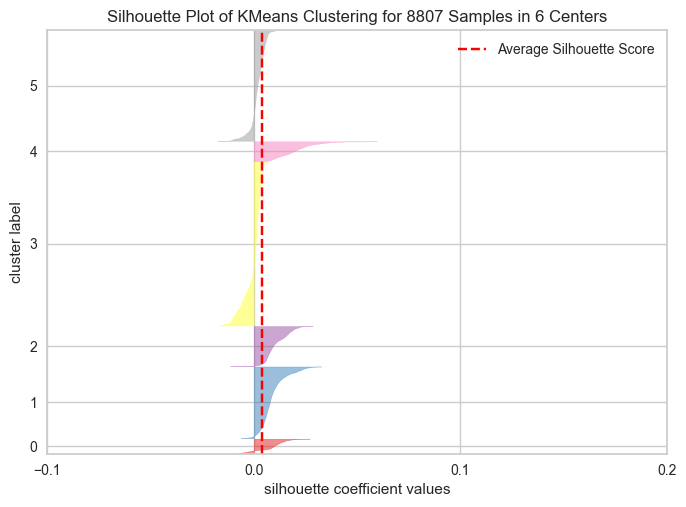

Number of clusters: 7,  Silhouette Score: 0.004180750316691029


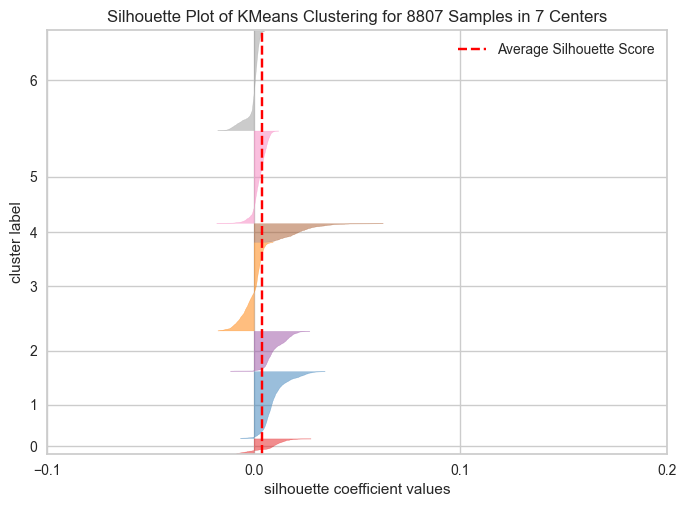

Number of clusters: 8,  Silhouette Score: 0.004848117241388283


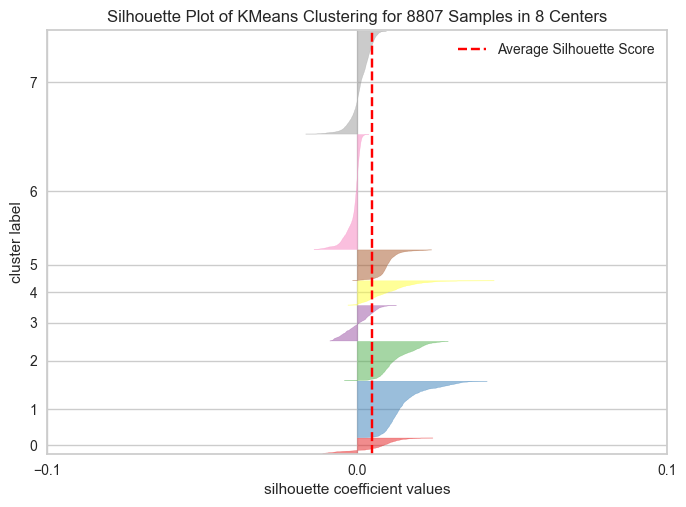

Number of clusters: 9,  Silhouette Score: 0.005447067530214479


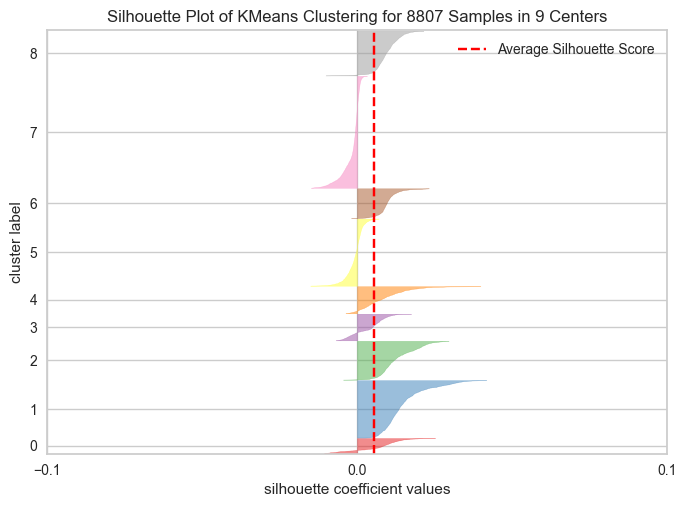

Number of clusters: 10,  Silhouette Score: 0.005673109854233863


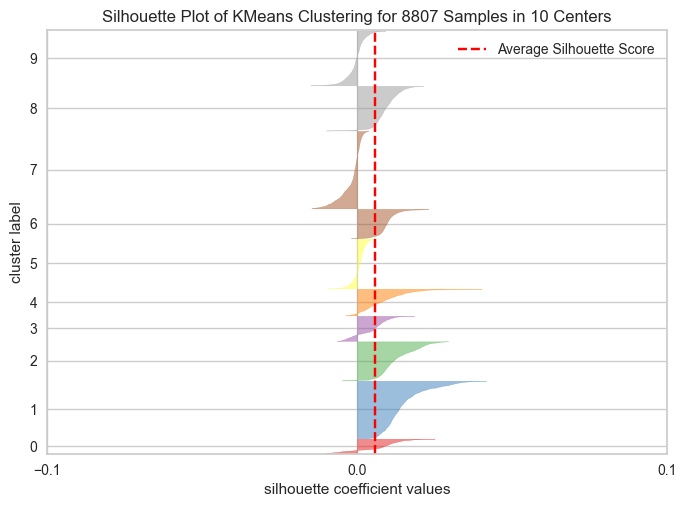

Number of clusters: 11,  Silhouette Score: 0.002948427244519014


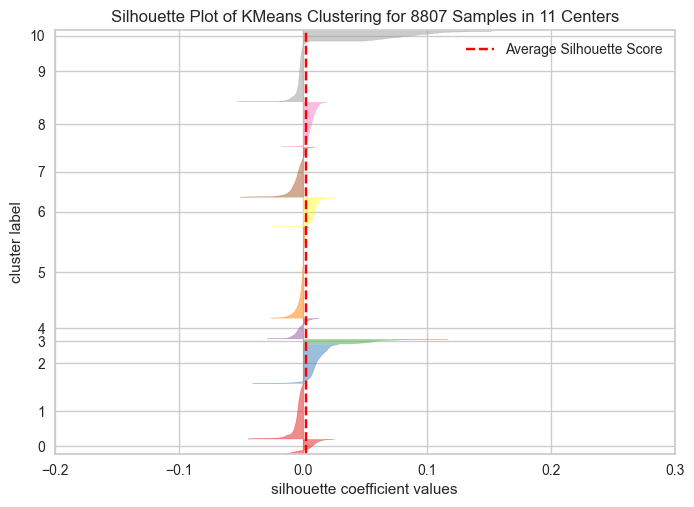

Number of clusters: 12,  Silhouette Score: 0.0032524751167780207


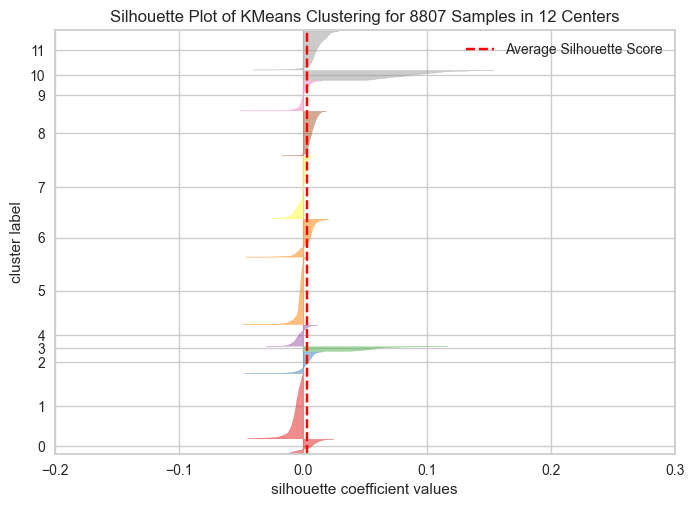

Number of clusters: 13,  Silhouette Score: 0.003870858899074586


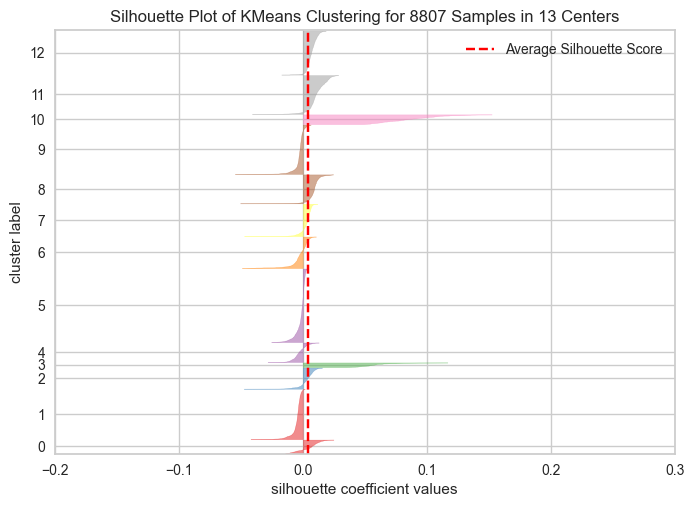

Number of clusters: 14,  Silhouette Score: 0.0030956899350427698


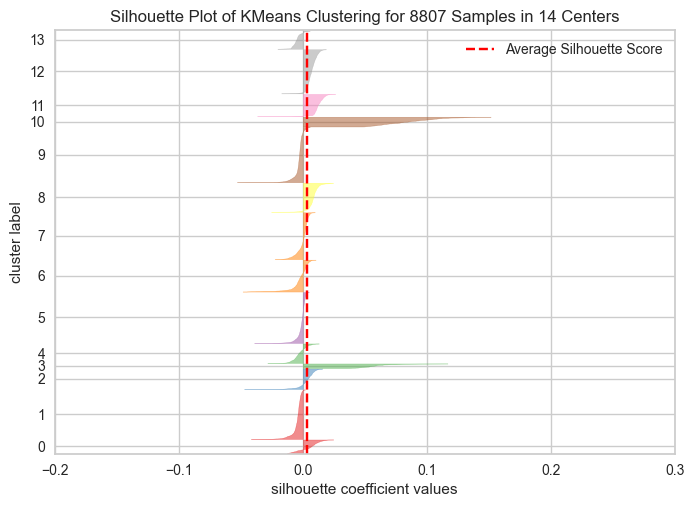

Number of clusters: 15,  Silhouette Score: 0.003621228900973989


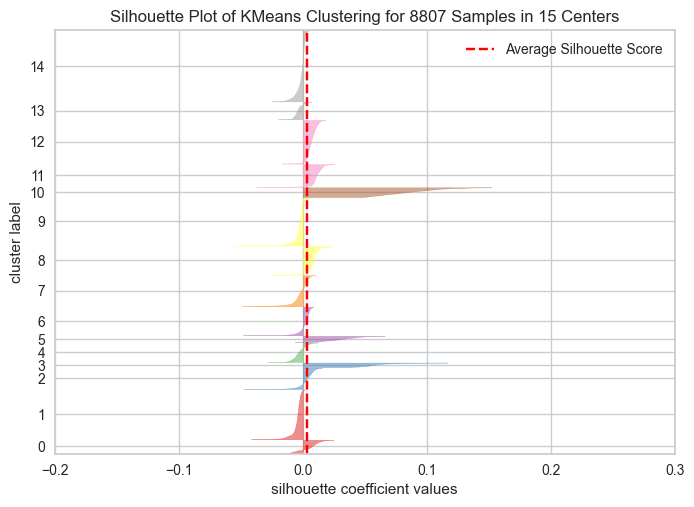

Number of clusters: 16,  Silhouette Score: 0.003457112902403907


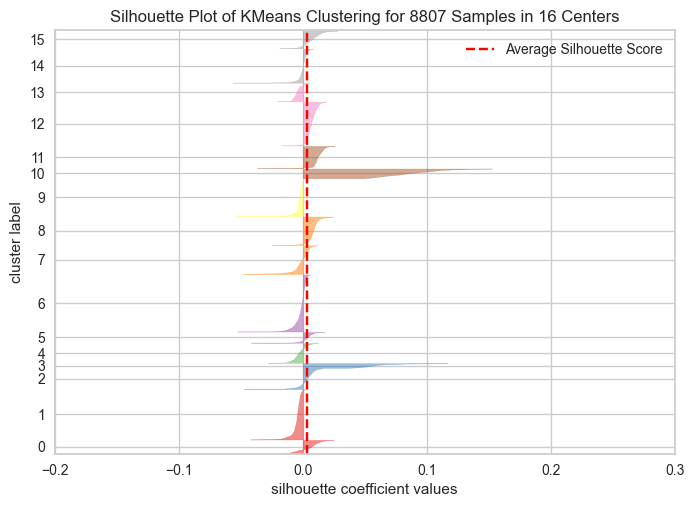

Number of clusters: 17,  Silhouette Score: 0.0036596568680897722


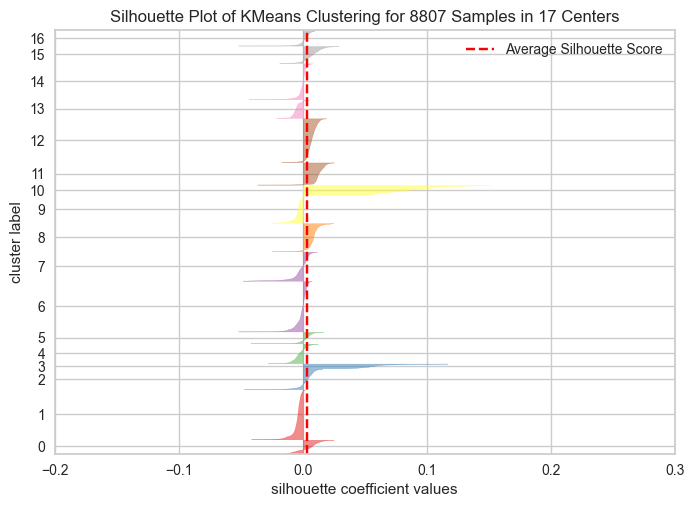

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

def score_analysis(n):
  for n_clusters in range(2, n):
    km = KMeans(init='k-means++', n_clusters=n_clusters, random_state=42)
    preds = km.fit_predict(X_transformed)
    centers = km.cluster_centers_

    score = silhouette_score(X_transformed, preds, metric='euclidean')
    print(f'Number of clusters: {n_clusters},  Silhouette Score: {score}')

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X_transformed)
    visualizer.poof()

score_analysis(18)

In [89]:
wcss = [] #storing Within-Cluster Sum of Squares in a list

for i in range(2, 27):
  kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10, random_state=42)
  kmeans.fit(X_transformed)
  wcss.append(kmeans.inertia_)

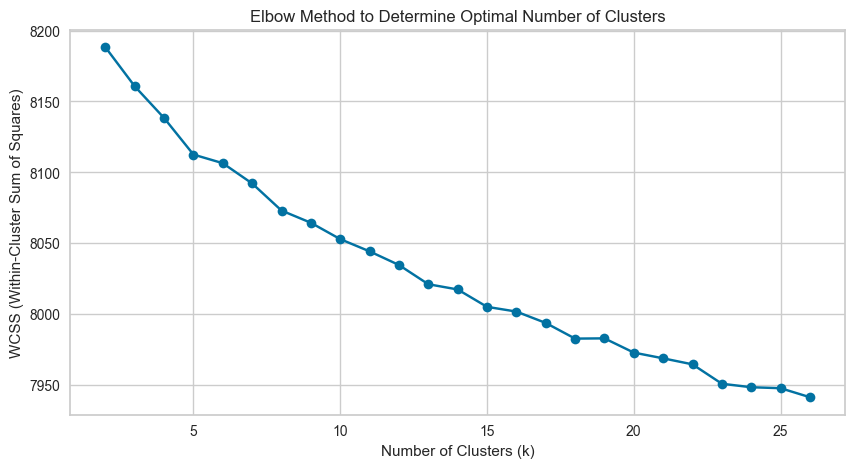

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 27), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

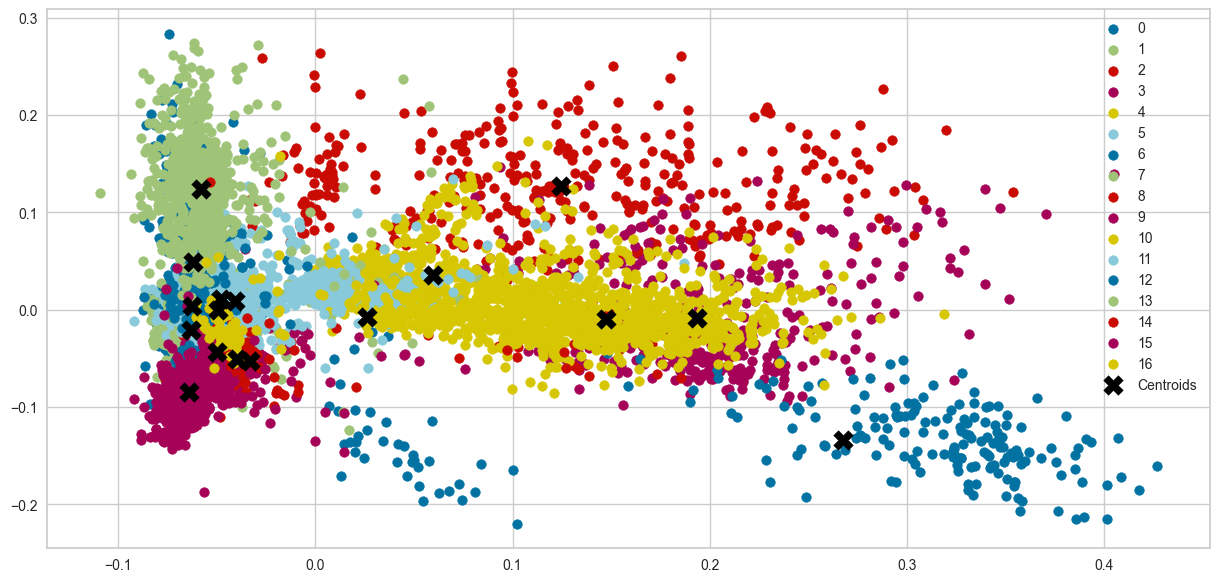

In [91]:
plt.figure(figsize=(15,7))
kmeans = KMeans(init='k-means++', n_clusters=17, n_init=10, random_state=42)
kmeans.fit(X_transformed)
label = kmeans.fit_predict(X_transformed)
unique_labels = np.unique(label)

for i in unique_labels:
  plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()
plt.show()

In [92]:
df['kmeans_cluster'] = kmeans.labels_

In [93]:
df['kmeans_cluster'].value_counts()

kmeans_cluster
11    1330
9      943
15     897
10     770
13     680
4      589
0      554
7      552
1      504
3      389
2      361
12     274
16     243
5      231
6      204
8      159
14     127
Name: count, dtype: int64

## V. Deep Clustering

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import silhouette_score

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [96]:
print("Mean per component:", np.mean(X_transformed, axis=0)[:5])  # first 5 means
print("Std dev per component:", np.std(X_transformed, axis=0)[:5]) # first 5 std devs

Mean per component: [-1.67630188e-16 -1.09610414e-17  3.68020591e-17  4.15325143e-17
  2.60442917e-17]
Std dev per component: [0.09781581 0.06721491 0.06022768 0.05749823 0.04708242]


The PCA output (X_transformed) is centered and scaled down, but standard deviation is less than 1, so the features aren’t spread out much.

This is perfectly fine for most models, especially neural networks — they can learn well with this scale.

So we will skip the Standardization process.

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_tensor = torch.tensor(X_transformed, dtype=torch.float32).to(device)

In [98]:
class Autoencoder(nn.Module):
  def __init__(self, input_dim, hidden_dim=64, latent_dim=10):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Linear(input_dim, hidden_dim),
      nn.ReLU(),
      nn.Linear(hidden_dim, latent_dim)
    )
    self.decoder = nn.Sequential(
      nn.Linear(latent_dim, hidden_dim),
      nn.ReLU(),
      nn.Linear(hidden_dim, input_dim)
    )

  def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return x_hat

In [99]:
input_dim = X_transformed.shape[1]  #if used standardization use X_scaled
model = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [100]:
#Pretraining Autoencoder
epochs = 20
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  output = model(X_tensor)
  loss = criterion(output, X_tensor)
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0 or epoch == 19:
    print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 0.0130
Epoch 10: Loss = 0.0042
Epoch 19: Loss = 0.0016


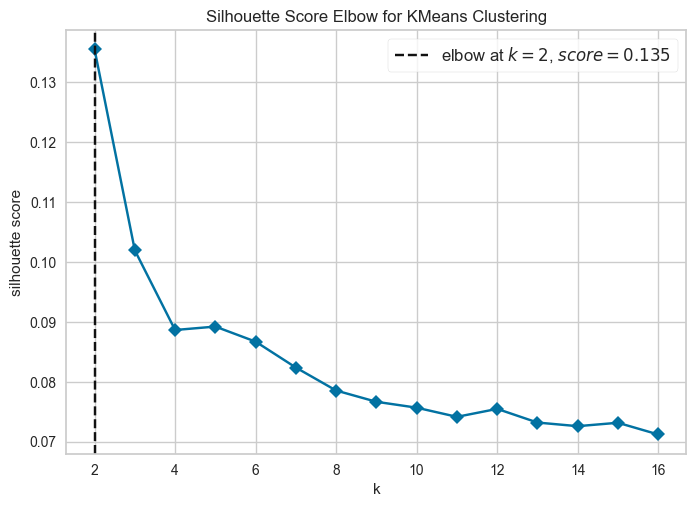

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [101]:
#Getting latent embeddings (encoder output) on CPU for sklearn (does not support GPU)
model.eval()
with torch.no_grad():
  embeddings = model.encoder(X_tensor).cpu().numpy()

kmeans_model = KMeans(init='k-means++', random_state=42)

visualizer = KElbowVisualizer(
  kmeans_model,
  k=(2, 17),
  metric='silhouette',
  timings=False,
  locate_elbow=True,
  colors='purple'
  )

visualizer.fit(embeddings)
visualizer.show()

Number of clusters: 2, Silhouette Score: 0.1355


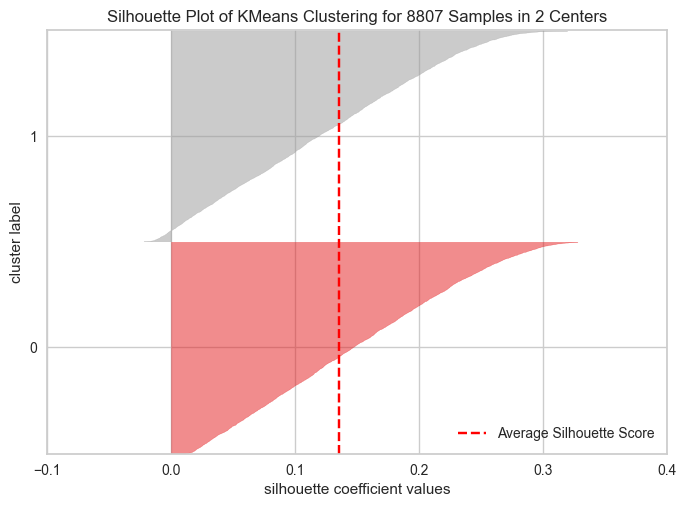

Number of clusters: 3, Silhouette Score: 0.1019


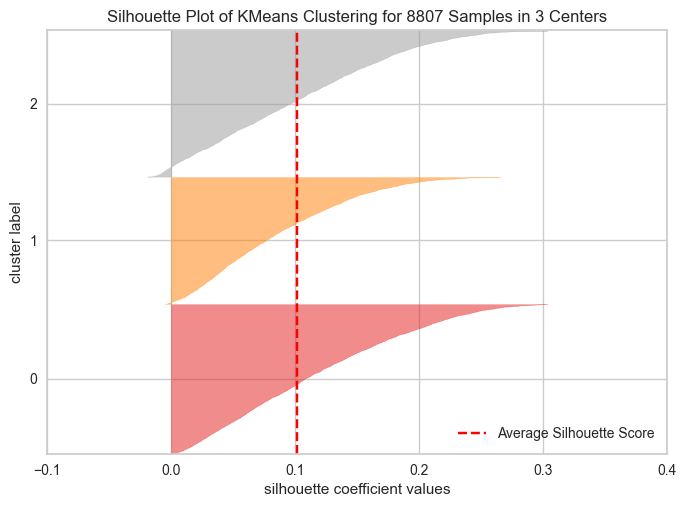

Number of clusters: 4, Silhouette Score: 0.0886


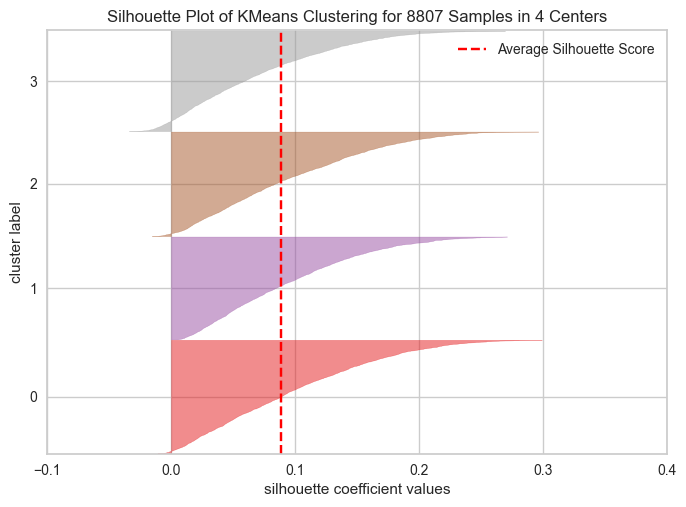

Number of clusters: 5, Silhouette Score: 0.0892


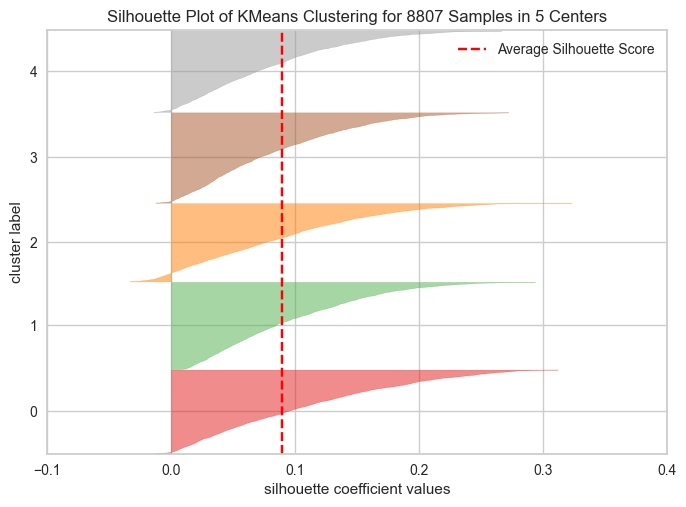

Number of clusters: 6, Silhouette Score: 0.0867


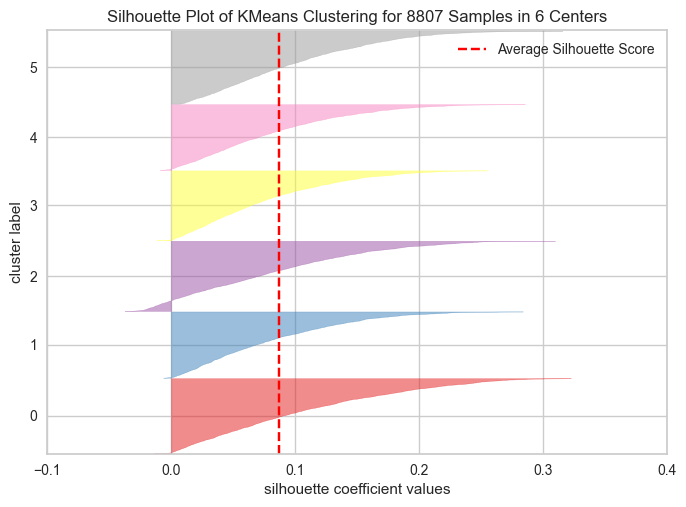

Number of clusters: 7, Silhouette Score: 0.0824


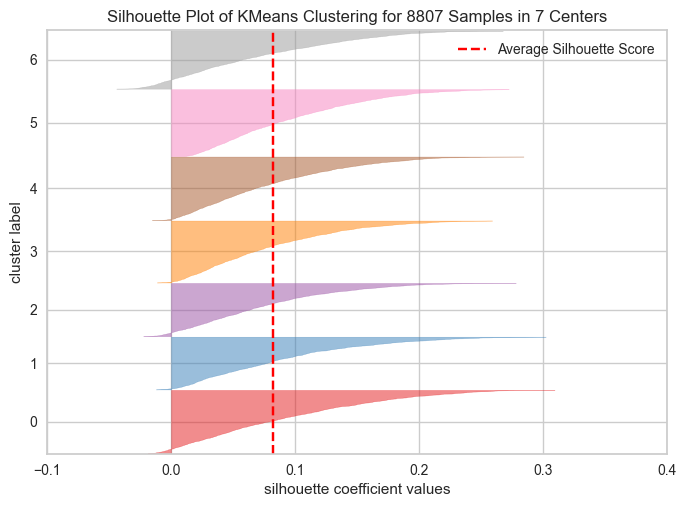

Number of clusters: 8, Silhouette Score: 0.0785


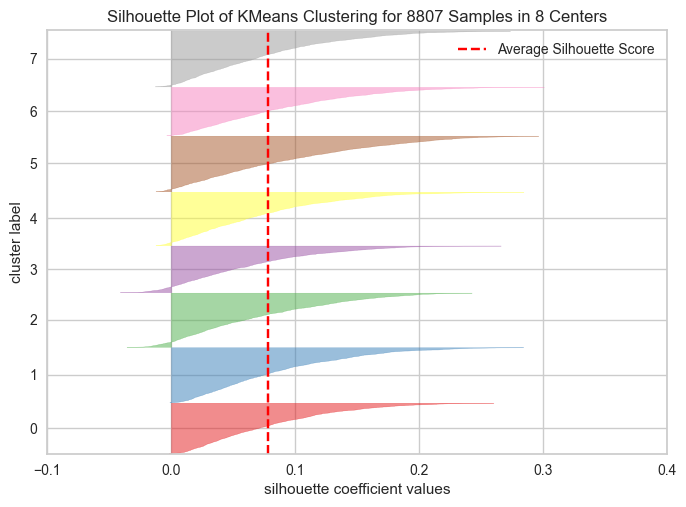

Number of clusters: 9, Silhouette Score: 0.0767


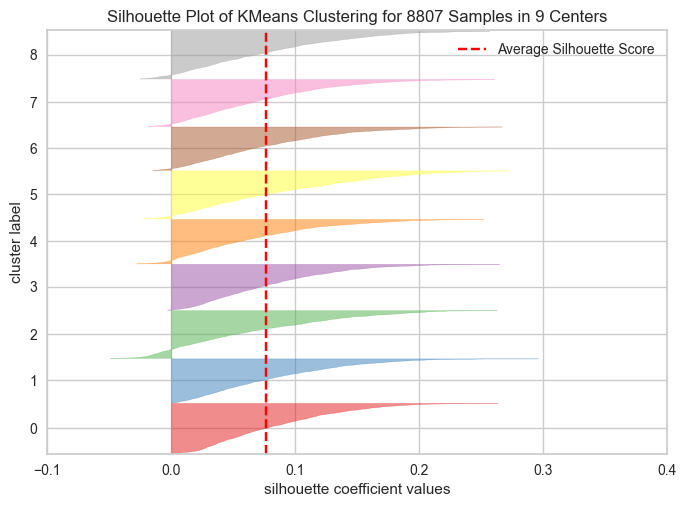

Number of clusters: 10, Silhouette Score: 0.0757


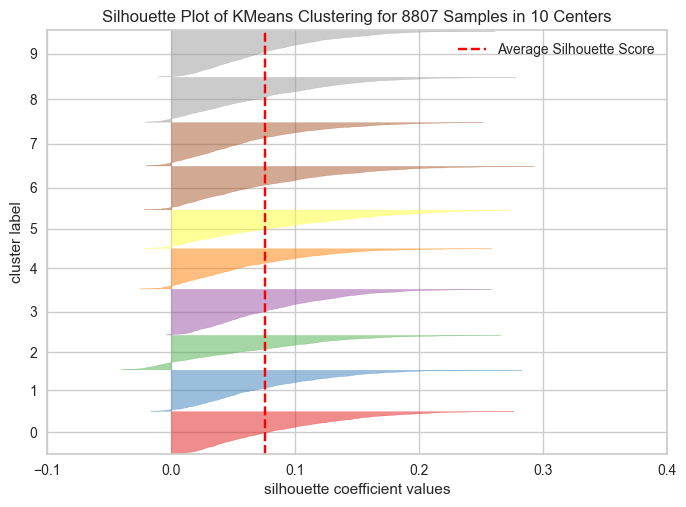

Number of clusters: 11, Silhouette Score: 0.0742


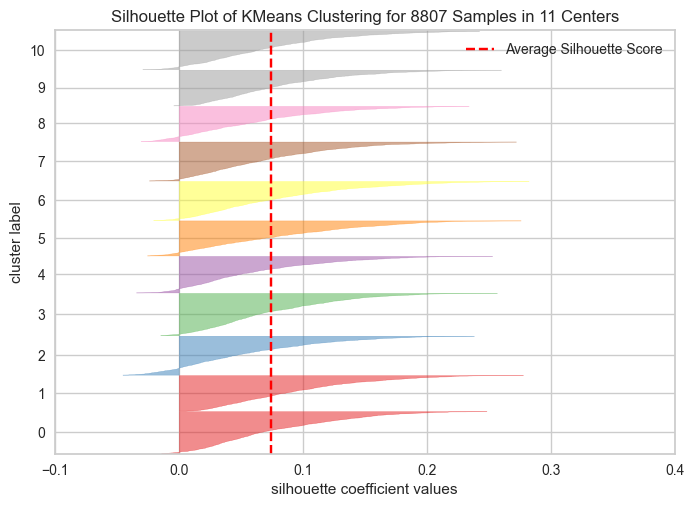

Number of clusters: 12, Silhouette Score: 0.0755


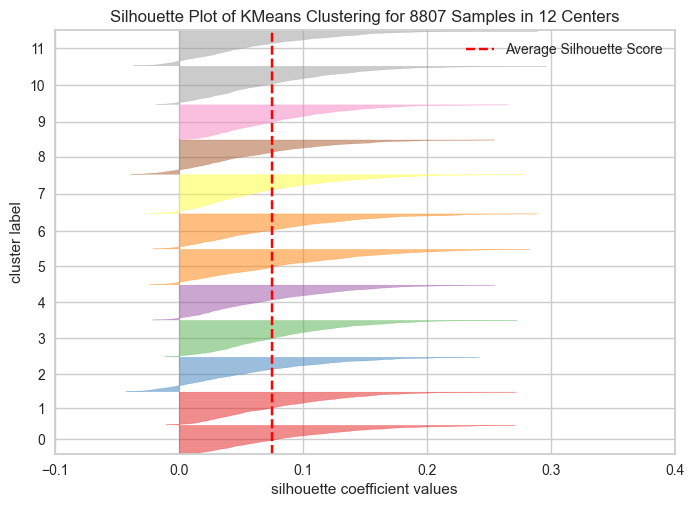

Number of clusters: 13, Silhouette Score: 0.0732


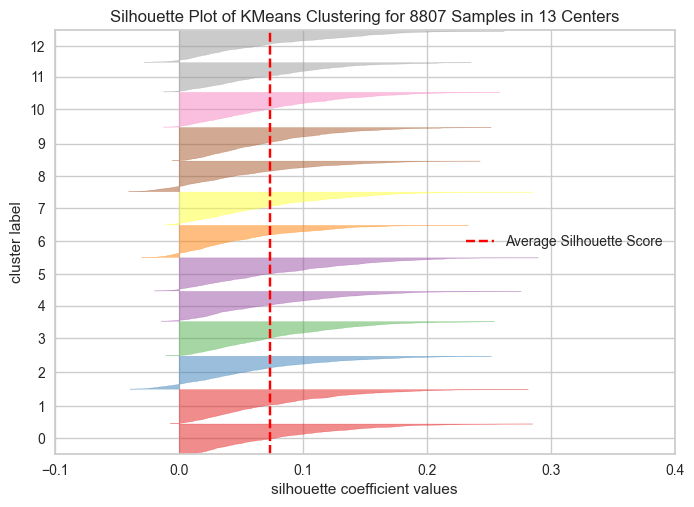

Number of clusters: 14, Silhouette Score: 0.0726


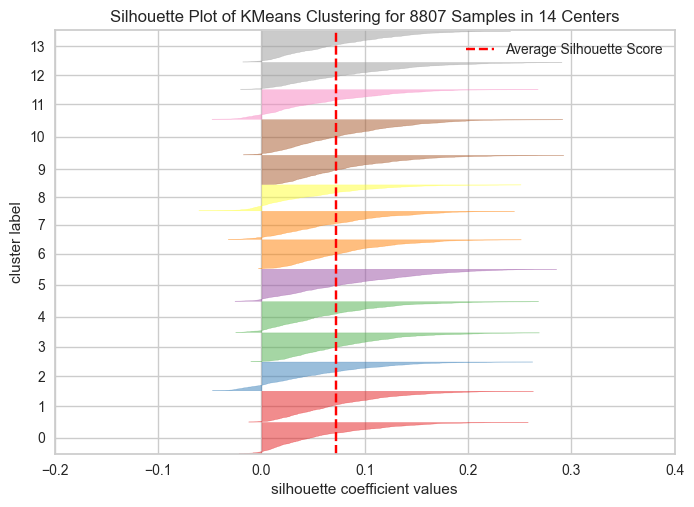

Number of clusters: 15, Silhouette Score: 0.0732


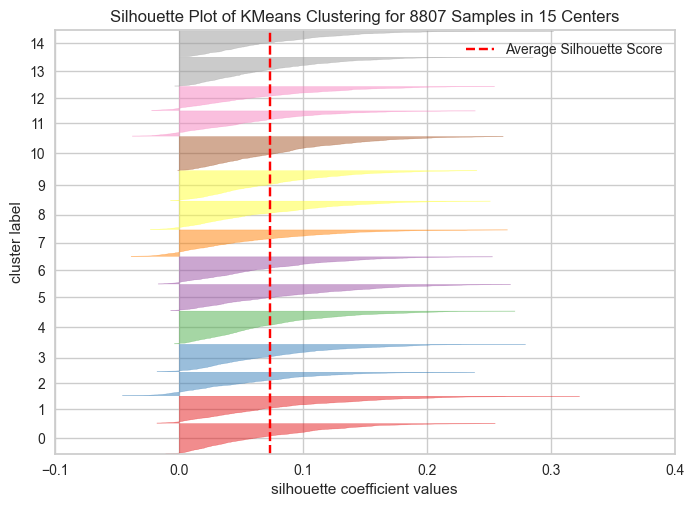

Number of clusters: 16, Silhouette Score: 0.0712


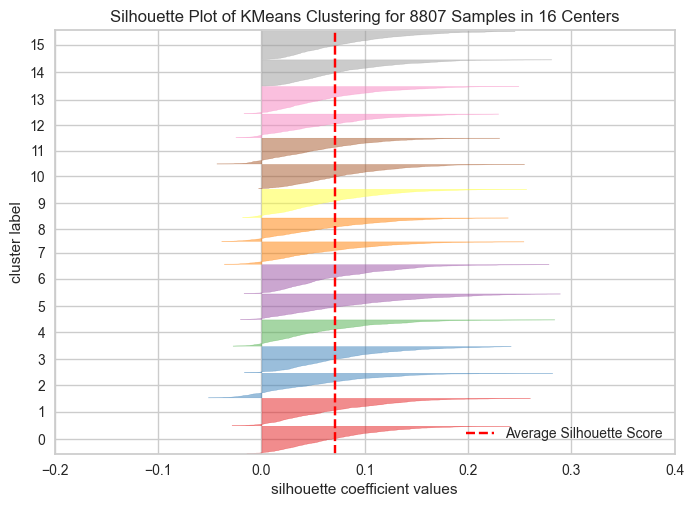

Number of clusters: 17, Silhouette Score: 0.0701


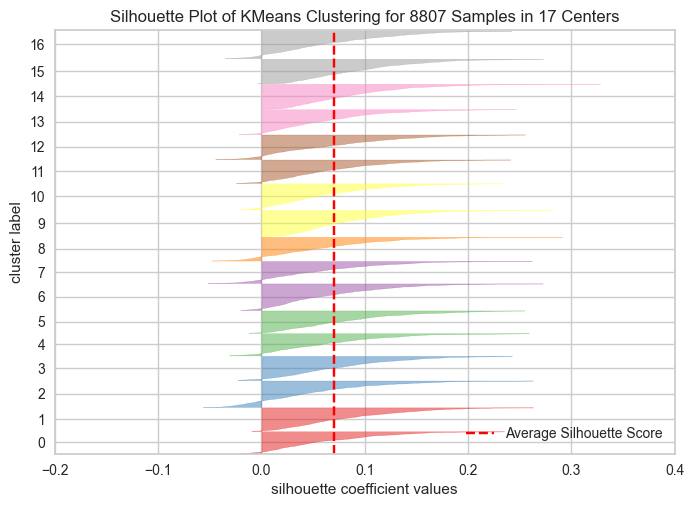

In [102]:
from yellowbrick.cluster import SilhouetteVisualizer

def dec_score_analysis(n, model, X_tensor, device):
  model.eval()
  with torch.no_grad():
    embeddings = model.encoder(X_tensor).cpu().numpy()
  
  for n_clusters in range(2, n):
    kmeans_model2 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=42)
    preds = kmeans_model2.fit_predict(embeddings)
    
    score = silhouette_score(embeddings, preds, metric='euclidean')
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')
    
    visualizer = SilhouetteVisualizer(kmeans_model2)
    visualizer.fit(embeddings)
    visualizer.poof()

dec_score_analysis(18, model, X_tensor, device)


Choosing 6 clusters, despite a slightly lower silhouette score compared to 2 clusters, can be more beneficial because it allows for finer and more meaningful segmentation of content in case of a REcommendation System. While 2 clusters may group items too broadly, 6 clusters can capture subtle differences between genres, rating and other parameters, enabling more personalized and relevant recommendations. Although the silhouette score measures cluster compactness and separation, it doesn’t always reflect the practical usefulness of the clusters for recommendation tasks. The increased number of clusters enriches the feature space when combined with other data, improving the quality of similarity calculations. Additionally, aligning the clustering with business goals or domain knowledge often requires more nuanced groups, which 6 clusters can provide, striking a balance between complexity and interpretability.

In [103]:
#Performing KMeans clustering on embeddings (CPU)
dec_kmeans = KMeans(init='k-means++', n_clusters=6, random_state=42)
cluster_labels = dec_kmeans.fit_predict(embeddings)

#Calculating Silhouette score
score = silhouette_score(embeddings, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.08670275658369064


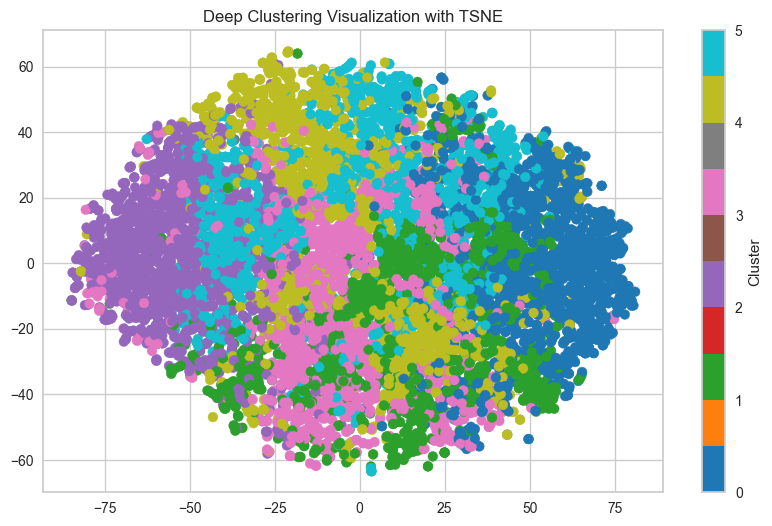

In [104]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_labels, cmap='tab10')
plt.title("Deep Clustering Visualization with TSNE")
plt.colorbar(label="Cluster")
plt.show()

In [105]:
df['dec_cluster'] = cluster_labels

In [106]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               No Cast  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                               No Cast  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            No Cast  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

      release_year rating  duration  \
0             2020  PG-13        90   
1             2021  TV-MA         2   
2             2021  TV-MA         1   
3             2021  TV-MA         1   
4             2021  TV-MA         2   
...            ...    ...       ...   
8802          2007      R       158   
8803          2018  TV-Y7         2   
8804          2009      R        88   
8805          2006     PG        88   
8806          2015  TV-14       111   

                                              listed_in  ... month_added  \
0                                         Documentaries  ...         9.0   
1       International TV Shows, TV Dramas, TV Mysteries  ...         9.0   
2     Crime TV Shows, International TV Shows, TV Act...  ...         9.0   
3                                Docuseries, Reality TV  ...         9.0   
4     International TV Shows, Romantic TV Shows, TV ...  ...         9.0   
...                                                 ...  ...         ...   
8802                     Cult Movies, Dramas, Thrillers  ...        11.0   
8803             Kids' TV, Korean TV Shows, TV Comedies  ...         7.0   
8804                            Comedies, Horror Movies  ...        11.0   
8805                 Children & Family Movies, Comedies  ...         1.0   
8806     Dramas, International Movies, Music & Musicals  ...         3.0   

      year_added   age_group  \
0         2021.0   Teenagers   
1         2021.0      Adults   
2         2021.0      Adults   
3         2021.0      Adults   
4         2021.0      Adults   
...          ...         ...   
8802      2019.0      Adults   
8803      2019.0  Older Kids   
8804      2019.0      Adults   
8805      2020.0  Older Kids   
8806      2019.0   Teenagers   

                                             clustering  \
0     Kirsten Johnson No Cast United States Document...   
1     Unknown Ama Qamata, Khosi Ngema, Gail Mabalane...   
2     Julien Leclercq Sami Bouajila, Tracy Gotoas, S...   
3     Unknown No Cast United States Docuseries, Real...   
4     Unknown Mayur More, Jitendra Kumar, Ranjan Raj...   
...                                                 ...   
8802  David Fincher Mark Ruffalo, Jake Gyllenhaal, R...   
8803  Unknown No Cast United States Kids' TV, Korean...   
8804  Ruben Fleischer Jesse Eisenberg

## Wordcloud

In [107]:
from wordcloud import WordCloud, STOPWORDS

def word_count(category):
  print(f'Exploring Cluster {category}')
  col_names = ['type', 'title', 'country', 'rating', 'listed_in', 'description']
  for i in col_names:
    df_word_cloud = df[['kproto_cluster', i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['kproto_cluster'] == category]
    text = " ".join(word for word in df_word_cloud[i])

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    print(f'Looking for insights from {i} Movies/TV Shows')
    plt.show()

Exploring Cluster 1
Looking for insights from type Movies/TV Shows


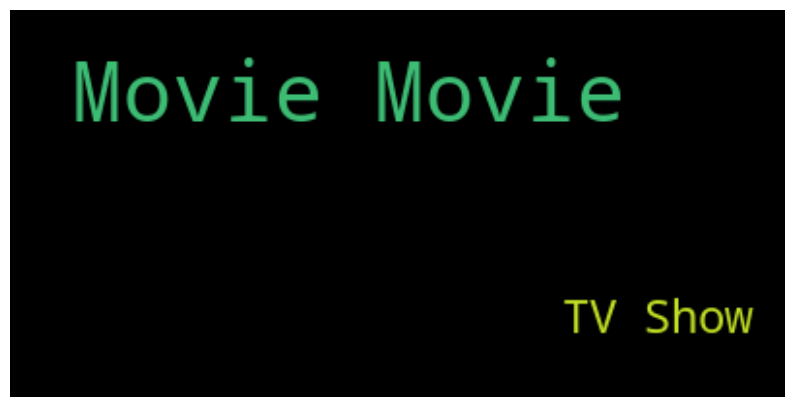

Looking for insights from title Movies/TV Shows


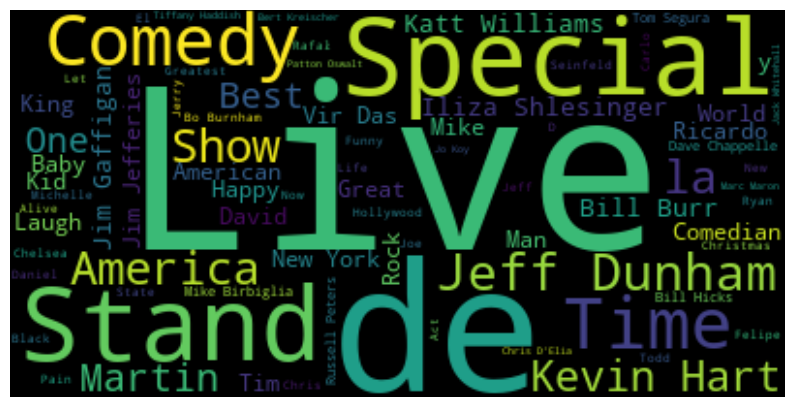

Looking for insights from country Movies/TV Shows


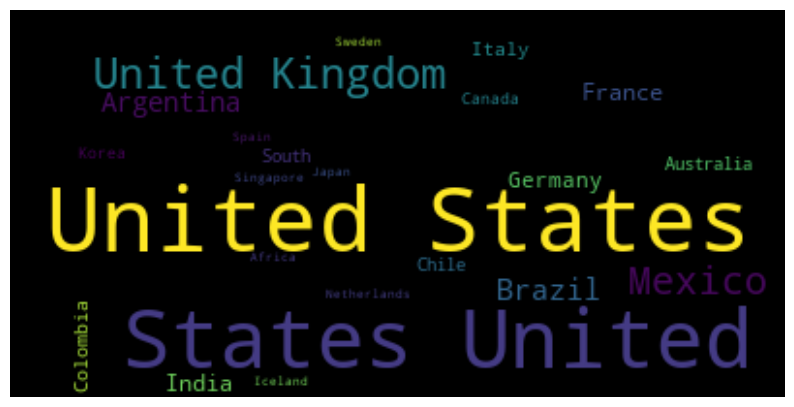

Looking for insights from rating Movies/TV Shows


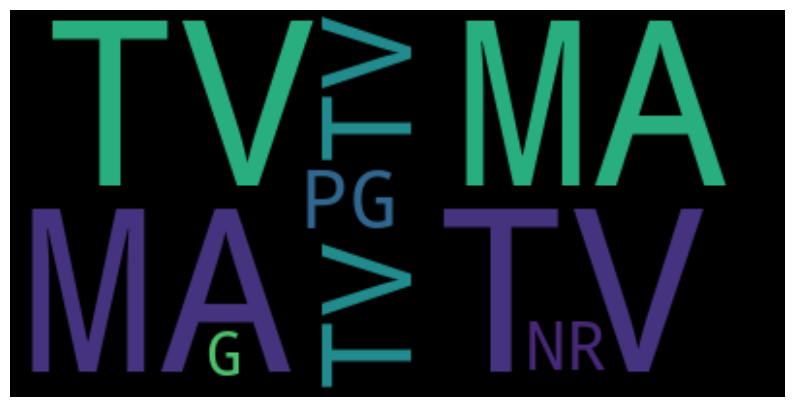

Looking for insights from listed_in Movies/TV Shows


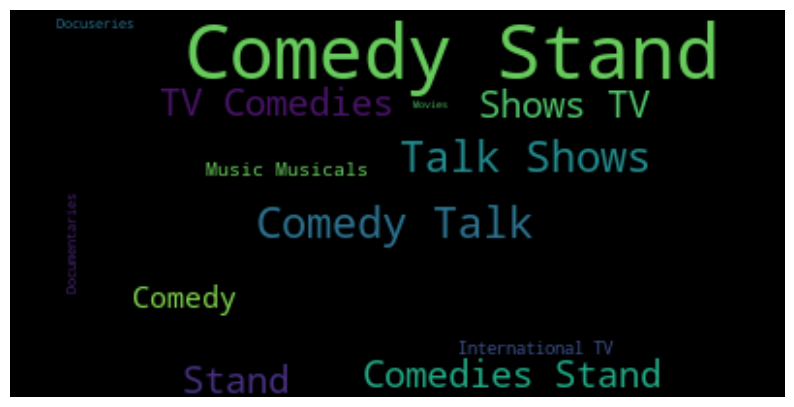

Looking for insights from description Movies/TV Shows


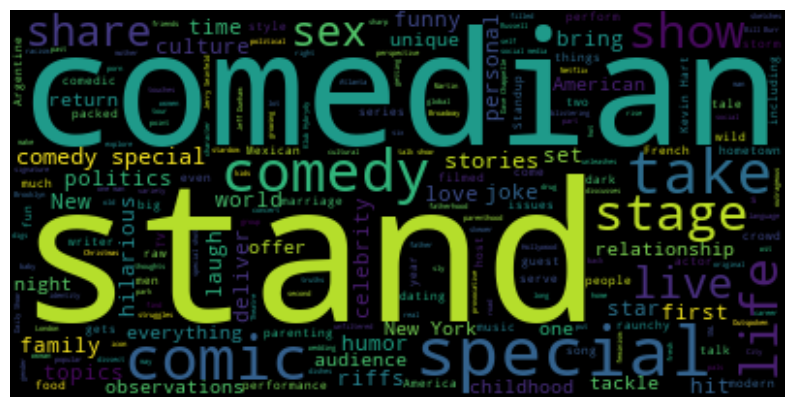

In [108]:
word_count(1)

# 8. Recommendation System

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## Creating a Cosine Similarity Matrix using df['CleanText']

In [110]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['CleanText'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 295984 stored elements and shape (8807, 46835)>

In [111]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [112]:
cosine_sim

array([[1.        , 0.        , 0.0038014 , ..., 0.00477369, 0.01281695,
        0.01833721],
       [0.        , 1.        , 0.01705317, ..., 0.01178171, 0.        ,
        0.00294743],
       [0.0038014 , 0.01705317, 1.        , ..., 0.01460975, 0.00732721,
        0.00611168],
       ...,
       [0.00477369, 0.01178171, 0.01460975, ..., 1.        , 0.05034165,
        0.00183474],
       [0.01281695, 0.        , 0.00732721, ..., 0.05034165, 1.        ,
        0.00691905],
       [0.01833721, 0.00294743, 0.00611168, ..., 0.00183474, 0.00691905,
        1.        ]], shape=(8807, 8807))

In [113]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [114]:
def get_recommendations(title, cosine_sim=cosine_sim, genre=None, release_year=None, content_type=None, age_group=None):
  if title not in indices:
    return "No such Movie/TV Show found"

  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

  movie_indices = [i[0] for i in sim_scores]
  recommendations = df.iloc[movie_indices]

  #Applying filters
  if genre:
    recommendations = recommendations[recommendations['listed_in'].str.contains(genre, case=False, na=False)]
  if release_year:
    recommendations = recommendations[recommendations['release_year'] == release_year]
  if content_type:
    recommendations = recommendations[recommendations['type'].str.lower() == content_type.lower()]
  if age_group:
    recommendations = recommendations[recommendations['age_group'].str.lower() == age_group.lower()]

  return recommendations[['title', 'listed_in', 'release_year', 'type', 'age_group']].head(10)

In [ ]:
get_recommendations(
  'Fullmetal Alchemist: Brotherhood',
  cosine_sim,
  genre=None,
  release_year=None,
  content_type=None,
  age_group=None
)

title  \
5095             Fullmetal Alchemist   
1538         Marvel Anime: Wolverine   
291                      SHAMAN KING   
3737                    Kill la Kill   
154              Kuroko's Basketball   
4862    Saint Seiya: The Lost Canvas   
5414           Little Witch Academia   
4628  DRAGON PILOT: Hisone & Masotan   
3541                          Naruto   
4208       GODZILLA The Planet Eater   

                                              listed_in  release_year  \
5095               Anime Series, International TV Shows          2003   
1538               Anime Series, International TV Shows          2011   
291                Anime Series, International TV Shows          2021   
3737               Anime Series, International TV Shows          2014   
154   Anime Series, International TV Shows, Teen TV ...          2015   
4862               Anime Series, International TV Shows          2009   
5414               Anime Series, International TV Shows          2017   
4628               Anime Series, International TV Shows          2018   
3541               Anime Series, International TV Shows          2006   
4208  Action & Adventure, Anime Features, Internatio...          2018   

         type   age_group  
5095  TV Show   Teenagers  
1538  TV Show   Teenagers  
291   TV Show   Teenagers  
3737  TV Show      Adults  
154   TV Show      Adults  
4862  TV Show      Adults  
5414  TV Show  Older Kids  
4628  TV Show   Teenagers  
3541  TV Show   Teenagers  
4208    Movie  Older Kids

In [ ]:
#np.save('Model/cosine_sim.npy', cosine_sim)

## Creating a Cosine Similarity Matrix using df['CleanText'] along with cluster features (kproto_cluster, hdbscan_cluster, lda_hdbscan_cluster, kmeans_cluster and dec_cluster)

In [116]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [117]:
df[df['title'].str.contains('Naruto', case=False, na=False)]

show_id     type                                              title  \
56       s57    Movie           Naruto Shippuden the Movie: Blood Prison   
57       s58    Movie                  Naruto Shippûden the Movie: Bonds   
58       s59    Movie       Naruto Shippûden the Movie: The Will of Fire   
59       s60    Movie                        Naruto Shippuden: The Movie   
60       s61    Movie        Naruto Shippuden: The Movie: The Lost Tower   
61       s62    Movie   Naruto the Movie 2: Legend of the Stone of Gelel   
62       s63    Movie  Naruto the Movie 3: Guardians of the Crescent ...   
63       s64    Movie  Naruto the Movie: Ninja Clash in the Land of Snow   
3541   s3542  TV Show                                             Naruto   
7559   s7560    Movie                    Naruto Shippuden : Blood Prison   

                director                                               cast  \
56       Masahiko Murata  Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...   
57       Hajime Kamegaki  Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...   
58       Masahiko Murata  Junko Takeuchi, Chie Nakamura, Kazuhiko Inoue,...   
59       Hajime Kamegaki  Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...   
60       Masahiko Murata  Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...   
61    Hirotsugu Kawasaki  Junko Takeuchi, Gamon Kaai, Chie Nakamura, Sho...   
62       Toshiyuki Tsuru  Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...   
63        Tensai Okamura  Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...   
3541         Hayato Date  Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...   
7559     Masahiko Murata  Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...   

     country  release_year rating  duration  \
56     Japan          2011  TV-14       102   
57     Japan          2008  TV-PG        93   
58     Japan          2009  TV-PG        96   
59     Japan          2007  TV-PG        95   
60     Japan          2010  TV-14        85   
61     Japan          2005  TV-PG        97   
62     Japan          2006  TV-PG        95   
63     Japan          2004  TV-PG        83   
3541   Japan          2006  TV-14         9   
7559   Japan          2011  TV-14       102   

                                              listed_in  ... month_added  \
56    Action & Adventure, Anime Features, Internatio...  ...         9.0   
57    Action & Adventure, Anime Features, Internatio...  ...         9.0   
58    Action & Adventure, Anime Features, Internatio...  ...         9.0   
59    Action & Adventure, Anime Features, Internatio...  ...         9.0   
60    Action & Adventure, Anime Features, Internatio...  ...         9.0   
61    Action & Adventure, Anime Features, Internatio...  ...         9.0   
62    Action & Adventure, Anime Features, Internatio...  ...         9.0   
63    Action & Adventure, Anime Features, Internatio...  ...         9.0   
3541               Anime Series, International TV Shows  ...         9.0   
7559  Action & Adventure, Anime Features, Internatio...  ...         9.0   

      year_added   age_group  \
56        2021.0   Teenagers   
57        2021.0  Older Kids   
58        2021.0  Older Kids   
59        2021.0  Older Kids   
60        2021.0   Teenagers   
61        2021.0  Older Kids   
62        2021.0  Older Kids   
63        2021.0  Older Kids   
3541      2019.0   Teenagers   
7559      2017.0   Teenagers   

                                             clustering  \
56    Masahiko Murata Junko Takeuchi, Chie Nakamura,...   
57    Hajime Kamegaki Junko Takeuchi, Chie Nakamura,...   
58    Masahiko Murata Junko Takeuchi, Chie Nakamura,...   
59    Hajime Kamegaki Junko Takeuchi, Chie Nakamura,...   
60    Masahiko Murata Junko Takeuchi, Chie Nakamura,...   
61    Hirotsugu Kawasaki Junko Takeuchi, Gamon Kaai,...   
62    Toshiyuki Tsuru Junko Takeuchi, Chie Nakamura,...   
63    Tensai Okamura Junko Takeuchi, Noriaki Sugiyam...   
3541  Hayato Date Junko Takeuchi, Chie Nakamura, Nor...   


In [118]:
#Clustering columns that are to be included
cluster_cols = ['hdbscan_cluster', 'kmeans_cluster']

#Converting cluster labels to strings (categorical)
clusters_str = df[cluster_cols].astype(str)

#One-hot encode clusters (sparse output)
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
clusters_onehot = ohe.fit_transform(clusters_str)

In [119]:
#TF-IDF vectorizer on combined text features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['CleanText'])

#Combining TF-IDF matrix and one-hot cluster features horizontally
combined_features = hstack([tfidf_matrix, clusters_onehot])

In [ ]:
#Computing cosine similarity on combined features
cosine_sim_cluster = cosine_similarity(combined_features, combined_features)

In [121]:
#Creating indices mapping titles to dataframe indices
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
def get_recommendations_cluster(title, cosine_sim=cosine_sim_cluster, genre=None, release_year=None, content_type=None, age_group=None):
  if title not in indices:
    return "No such Movie/TV Show found"

  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

  movie_indices = [i[0] for i in sim_scores]
  recommendations = df.iloc[movie_indices]

  # Apply filters
  if genre:
    recommendations = recommendations[recommendations['listed_in'].str.contains(genre, case=False, na=False)]
  if release_year:
    recommendations = recommendations[recommendations['release_year'] == release_year]
  if content_type:
    recommendations = recommendations[recommendations['type'].str.lower() == content_type.lower()]
  if age_group:
    recommendations = recommendations[recommendations['age_group'].str.lower() == age_group.lower()]

  return recommendations[['title', 'listed_in', 'release_year', 'type', 'age_group']].head(10)

In [ ]:
get_recommendations_cluster('Neon Genesis Evangelion')

title  \
3720                          EVANGELION: DEATH (TRUE)²   
3728                              The End of Evangelion   
2444                                  Cardcaptor Sakura   
4633                              Mobile Suit Gundam UC   
54    InuYasha the Movie: Affections Touching Across...   
5098                             Pokémon: Indigo League   
3541                                             Naruto   
3098                                          Fireworks   
5414                              Little Witch Academia   
5096                   Fullmetal Alchemist: Brotherhood   

                                              listed_in  release_year  \
3720  Action & Adventure, Anime Features, Internatio...          1998   
3728  Action & Adventure, Anime Features, Internatio...          1997   
2444               Anime Series, International TV Shows          1999   
4633               Anime Series, International TV Shows          2014   
54    Action & Adventure, Anime Features, Internatio...          2001   
5098                             Anime Series, Kids' TV          2000   
3541               Anime Series, International TV Shows          2006   
3098                    Anime Features, Romantic Movies          2017   
5414               Anime Series, International TV Shows          2017   
5096               Anime Series, International TV Shows          2010   

         type   age_group  
3720    Movie      Adults  
3728    Movie      Adults  
2444  TV Show  Older Kids  
4633  TV Show  Older Kids  
54      Movie  Older Kids  
5098  TV Show  Older Kids  
3541  TV Show   Teenagers  
3098    Movie  Older Kids  
5414  TV Show  Older Kids  
5096  TV Show   Teenagers

In [ ]:
#np.save('Model/cosine_sim_cluster.npy', cosine_sim_cluster)